<table align = "center" width = 100%>
   <tr>
       </td>
           </td>
       </td>
       <td>
          <div align = "center">
               <font color = "#21618C" size = 8px>
                          <b>Data Analytics on India's Top IT companies' Dataset.</b>
               </font>
          </div>
        </td>
    <tr>
</table>

**Problem Statement:- How have factors such as hiring trends, automation adoption, and third-party software sales impacted the revenue per employee and overall financial performance of India's top IT companies (TCS, Infosys, HCL) in FY25, and what predictive insights can be derived to optimize workforce strategies and revenue growth in a challenging macroeconomic environment?**

### Importing Necessary Libraries

In [1]:
# pandas library for accessing data structures which helps in loading and handling the dataset.
import pandas as pd

# Numpy library to perform certain mathematical operations and accessing numpy array
import numpy as np

# Matplotlib library for plotting graphs for analysis and visualization of the data
import matplotlib.pyplot as plt

# Seaborn library for plotting more dynamic and visually appealing graphs
import seaborn as sns

# To run Chi-square test
from scipy.stats import chi2_contingency

# Step-1: Data Overview

In [2]:
# loading the dataset
df_IT_companies_data = pd.read_csv("IT_Companies_FY25_Dataset.csv")

In [3]:
# Checking columns and rows of the dataset
No_of_rows, No_of_columns = df_IT_companies_data.shape

#Printing number of columns
print("Number of Columns:",No_of_columns)

#Printing number of rows
print("Number of Rows:",No_of_rows)

Number of Columns: 25
Number of Rows: 102000


In [4]:
# Setting max columns option, so that it will be able to display all the columns of the dataset
pd.set_option("display.max_columns", None)

# Setting max rows option, so that it will be able to display all the rows of the dataset
pd.set_option("display.max_rows", None)

In [5]:
# Printing first few values of the dataset to check the type of values and columns in the dataset
df_IT_companies_data.head()

,Company_Name,Fiscal_Year,Revenue_Per_Employee,Total_Revenue,Employee_Count,Hiring_Rate,Attrition_Rate,Automation_Investment,Automation_Level,Software_Sales_Revenue,Deal_Wins,BFSI_Revenue_Share,Global_IT_Spending,GDP_Growth_Rate,Region,Data_Source,Timestamp,Client_Retention_Rate,R_and_D_Spending,Patent_Filings,Employee_Skill_Index,Training_Hours_Per_Employee,Project_Delivery_Time,Exchange_Rate,Geopolitical_Risk_Index
0,Inofsys,FY23,49891.198632,7.241907,365309.0,0.044905,0.203195,643.652002,0.781389,191.753734,6.169306,0.279625,3.421132,0.022131,Asia,NASSCOM,2021-11-25 12:07:22.226791,0.894559,314.242623,54.0,80.140035,39.151758,5.617178,82.113967,61.848051
1,Tech Mahindra,FY23,44814.044657,10.104043,147336.0,0.026811,0.177066,625.879269,0.476151,217.673769,3.309471,0.286060,4.433966,0.031753,India,Mint,2024-11-10 12:07:22.226814,0.953555,203.149614,NaN,88.449497,24.891403,4.500342,82.756444,44.135494
2,Wipro,FY22,44156.391290,5.663190,220106.0,0.031468,0.180725,605.483511,0.415043,181.879421,4.292336,0.283800,4.320490,0.021901,India,Annual Report,2025-05-06 12:07:22.226817,0.937054,264.032929,NaN,NaN,26.784836,7.394388,81.950479,54.420948
3,HCL,FY23,49734.185127,8.998903,230009.0,0.038726,0.210030,NaN,0.457104,791.465191,5.311996,0.177133,3.914585,0.019317,India,NASSCOM,2021-04-30 12:07:22.226820,0.730621,218.437804,51.0,69.855504,45.439180,5.616594,83.923364,36.191326
4,TCS,FY22,46574.790478,12.597363,569955.0,0.022062,0.101729,NaN,0.343866,289.006881,4.367123,0.484309,3.093355,0.030212,NaN,Annual Report,2023-12-11 12:07:22.226823,NaN,55.932207,46.0,70.077190,12.361583,6.144849,82.524297,63.896574


## **About the dataset (India's Top IT Companies dataset)**
The data set contains 102,001 observations about India's top IT companies TCS, HCL, Infosys, Tech Mahindra and Wipro from Fiscal year 2020 to 2025. There are mutliple columns about which information is given below.

#### Data Dictionary
- **`Company_Name`**: This column simply tells us that each observation is about which **company**.
  
- **`Fiscal_Year`**: This column simply tells us that each observation is about company's which **fiscal year**.
- **`Revenue_Per_Employee`**: This column simply tells us about **Revenue per employee** in each company in a particular fiscal year.
- **`Total_Revenue`**: This column simply tells us about the **Total Revenue** of each company in a particular fiscal year.
- **`Employee_Count`**: This column simply tells us about the **Number of employees** in each company.
- **`Hiring_Rate`**: This column simply tells us about at **which rate a company hired** in that particular fiscal year.
- **`Attrition_Rate`**: This column tells us about at **which rate a Employees left that company** in that particular fiscal year.
- **`Automation_Investment`**: This column tells us about **How much money did the company invested in automation tools and AI Technologies to increase productivity and efficiency** in that particular fiscal year.
- **`Automation_Level`**: This column tells us about **How much percentage of the company'a operational processes were done with Automation tools and AI Technologies** in that particular fiscal year.
- **`Software_Sales_Revenue`**: This column tells us about the **Revenue generated by the company by selling and licensed software products developed by them or just distributed by them** in that particular fiscal year.
- **`Deal_Wins`**: This column tells us about the **Monetary value of the Deals done by the company which includes Consulting projects, Software implementation projects, etc** in that particular fiscal year.
- **`BFSI_Revenue_Share`**: This column tells us about the **Percentage of the total revenue of the company that comes by providing services in the Banking, financial Services and Insurance sector** in that particular fiscal year.
- **`BFSI_Revenue_Share`**: This column tells us about the **Percentage of the total revenue of the company that comes by providing services in the Banking, financial Services and Insurance sector** in that particular fiscal year.
- **`Global_IT_Spending`**: This column tells us about the **Total Spending in the global IT market** in that particular fiscal year.
- **`GDP_Growth_Rate`**: This column tells us about the **Rate at which the global gdp grew** in that particular fiscal year.
- **`Region`**: This column tells us about the **Primary operating region of that company** for that particular fiscal year.
- **`Data_Source`**: This column tells us about the **Source of the data for that particular observation, from where it was obtained**.
- **`Timestamp`**: This column tells us about the **Date and time when the data for that particular observation/record was sourced**.
- **`Client_Retention_Rate`**: This column tells us about the **Percentage of clients from the previous fiscal year that were retained and continued their contracts with the company in the next fiscal year**.
- **`R_and_D_Spending`**: This column tells us about the **Money spent by the company on Research and Development** in that particular fiscal year.
- **`Patent_Filings`**: This column tells us the **Number of Patents filed by a company** in that particular fiscal year.
- **`Employee_Skill_Index`**: This column tells us about **how skillful the employee are of a particular company (on a scale of 0-100)** in that particular fiscal year.
- **`Training_Hours_Per_Employee`**: This column tells us the **Average number of hours spent on training by each employee** of that company in that particular fiscal year.
- **`Project_Delivery_Time`**: This column tells us the **Average number of months spent to deliver a project** by that company in that particular fiscal year.
- **`Exchange_Rate`**: This column tells us the **Exchange rate of INR to USD** for that particular fiscal year.
- **`Geopolitical_Risk_Index`**: This column tells us about the **Global Geopolitical risk (Trade Tension, Political Instability, Conflicts, etc) for IT companies** for that particular fiscal year.

In [6]:
# Displaying the basic info about the dataset to get to see how many categorical and non-categorical columns are there in the dataset
df_IT_companies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Company_Name                 102000 non-null  object 
 1   Fiscal_Year                  102000 non-null  object 
 2   Revenue_Per_Employee         96894 non-null   float64
 3   Total_Revenue                102000 non-null  float64
 4   Employee_Count               96919 non-null   float64
 5   Hiring_Rate                  91788 non-null   float64
 6   Attrition_Rate               93819 non-null   float64
 7   Automation_Investment        86687 non-null   float64
 8   Automation_Level             81619 non-null   float64
 9   Software_Sales_Revenue       91802 non-null   float64
 10  Deal_Wins                    96888 non-null   float64
 11  BFSI_Revenue_Share           102000 non-null  float64
 12  Global_IT_Spending           102000 non-null  float64
 13 

**Interpretation**

From this we can see that:
- There are **4 categorical columns** (which has object datatype).
- There are **20 Numerical columns**.
- And there is **1 Date time** type column **`Timestamp`**.

# Step-2: Data Preprocessing

## a) Renaming the columns

In [7]:
# Renaming the necessary columns appropriately
df_IT_companies_data = df_IT_companies_data.rename(columns = {"Revenue_Per_Employee": "Revenue_Per_Employee_in_USD_Thousands",
                                                              "Total_Revenue": "Total_Revenue_in_USD_Billions",
                                                              "Hiring_Rate": "Hiring_Rate_in_Percentage",
                                                              "Attrition_Rate": "Attrition_Rate_in_Percentage",
                                                              "Automation_Investment": "Automation_Investment_in_USD_Millions",
                                                              "Automation_Level": "Automation_Level_in_Percentage",
                                                              "Software_Sales_Revenue": "Software_Sales_Revenue_in_USD_Millions",
                                                              "Deal_Wins": "Deal_Wins_in_USD_Billions",
                                                              "BFSI_Revenue_Share": "BFSI_Revenue_Share_in_Percentage",
                                                              "Global_IT_Spending": "Global_IT_Spending_in_USD_Trillions",
                                                              "GDP_Growth_Rate": "Global_GDP_Growth_Rate_in_Percentages",
                                                              "Client_Retention_Rate": "Client_Retention_Rate_in_Percentage",
                                                              "R_and_D_Spending": "R_and_D_Spending_in_USD_Millions",
                                                              "Employee_Skill_Index": "Employee_Skill_Index_on_Scale_0_to_100",
                                                              "Project_Delivery_Time": "Project_Delivery_Time_in_Months",
                                                              "Exchange_Rate": "Exchange_Rate_of_INR_to_USD",
                                                              "Geopolitical_Risk_Index": "Geopolitical_Risk_Index_on_Scale_0_to_100",})

In [8]:
# Checking whether the column names are changed by using .head() method (which prints top 5 values of the dataset)
df_IT_companies_data.head()

,Company_Name,Fiscal_Year,Revenue_Per_Employee_in_USD_Thousands,Total_Revenue_in_USD_Billions,Employee_Count,Hiring_Rate_in_Percentage,Attrition_Rate_in_Percentage,Automation_Investment_in_USD_Millions,Automation_Level_in_Percentage,Software_Sales_Revenue_in_USD_Millions,Deal_Wins_in_USD_Billions,BFSI_Revenue_Share_in_Percentage,Global_IT_Spending_in_USD_Trillions,Global_GDP_Growth_Rate_in_Percentages,Region,Data_Source,Timestamp,Client_Retention_Rate_in_Percentage,R_and_D_Spending_in_USD_Millions,Patent_Filings,Employee_Skill_Index_on_Scale_0_to_100,Training_Hours_Per_Employee,Project_Delivery_Time_in_Months,Exchange_Rate_of_INR_to_USD,Geopolitical_Risk_Index_on_Scale_0_to_100
0,Inofsys,FY23,49891.198632,7.241907,365309.0,0.044905,0.203195,643.652002,0.781389,191.753734,6.169306,0.279625,3.421132,0.022131,Asia,NASSCOM,2021-11-25 12:07:22.226791,0.894559,314.242623,54.0,80.140035,39.151758,5.617178,82.113967,61.848051
1,Tech Mahindra,FY23,44814.044657,10.104043,147336.0,0.026811,0.177066,625.879269,0.476151,217.673769,3.309471,0.286060,4.433966,0.031753,India,Mint,2024-11-10 12:07:22.226814,0.953555,203.149614,NaN,88.449497,24.891403,4.500342,82.756444,44.135494
2,Wipro,FY22,44156.391290,5.663190,220106.0,0.031468,0.180725,605.483511,0.415043,181.879421,4.292336,0.283800,4.320490,0.021901,India,Annual Report,2025-05-06 12:07:22.226817,0.937054,264.032929,NaN,NaN,26.784836,7.394388,81.950479,54.420948
3,HCL,FY23,49734.185127,8.998903,230009.0,0.038726,0.210030,NaN,0.457104,791.465191,5.311996,0.177133,3.914585,0.019317,India,NASSCOM,2021-04-30 12:07:22.226820,0.730621,218.437804,51.0,69.855504,45.439180,5.616594,83.923364,36.191326
4,TCS,FY22,46574.790478,12.597363,569955.0,0.022062,0.101729,NaN,0.343866,289.006881,4.367123,0.484309,3.093355,0.030212,NaN,Annual Report,2023-12-11 12:07:22.226823,NaN,55.932207,46.0,70.077190,12.361583,6.144849,82.524297,63.896574


**Interpretation**

Yes we can see the name of columns are changed.

## b) Null value Handling

In [9]:
# Checking how many null values are present in the dataset in percentage
((df_IT_companies_data.isna().sum())*100)/len(df_IT_companies_data)

Company_Name                                  0.000000
Fiscal_Year                                   0.000000
Revenue_Per_Employee_in_USD_Thousands         5.005882
Total_Revenue_in_USD_Billions                 0.000000
Employee_Count                                4.981373
Hiring_Rate_in_Percentage                    10.011765
Attrition_Rate_in_Percentage                  8.020588
Automation_Investment_in_USD_Millions        15.012745
Automation_Level_in_Percentage               19.981373
Software_Sales_Revenue_in_USD_Millions        9.998039
Deal_Wins_in_USD_Billions                     5.011765
BFSI_Revenue_Share_in_Percentage              0.000000
Global_IT_Spending_in_USD_Trillions           0.000000
Global_GDP_Growth_Rate_in_Percentages         0.000000
Region                                        9.917647
Data_Source                                   0.000000
Timestamp                                     0.000000
Client_Retention_Rate_in_Percentage          10.004902
R_and_D_Sp

**Interpretation**

Here we can see that columns have different percentage of null values, we are now going to apply a rule of handling null values.

- If there are less than 10 percent of null values in a particular column we will drop it.
- If the percentage of the null values lies between 10-70 percent, then we will fill the null values with different methods such as filling with mean, median, mode, forward fill or backward fill, etc.
- If the percentage of null values is more than 70 percent, then we will drop the whole column

In [10]:
# Dealing with null values accordingly

# Filling the null values of the columns with their mean which require filling
df_IT_companies_data.fillna(value = {'Hiring_Rate_in_Percentage': df_IT_companies_data['Hiring_Rate_in_Percentage'].mean(),
                                     'Automation_Investment_in_USD_Millions': df_IT_companies_data['Automation_Investment_in_USD_Millions'].mean(),
                                     'Automation_Level_in_Percentage': df_IT_companies_data['Automation_Level_in_Percentage'].mean(),
                                     'Software_Sales_Revenue_in_USD_Millions': df_IT_companies_data['Software_Sales_Revenue_in_USD_Millions'].mean(),
                                     'Region': df_IT_companies_data['Region'].mode(),
                                     'Client_Retention_Rate_in_Percentage': df_IT_companies_data['Client_Retention_Rate_in_Percentage'].mean(),
                                     'Patent_Filings': df_IT_companies_data['Patent_Filings'].mean(),
                                     'Employee_Skill_Index_on_Scale_0_to_100': df_IT_companies_data['Employee_Skill_Index_on_Scale_0_to_100'].mean(),
                                     'Training_Hours_Per_Employee': df_IT_companies_data['Training_Hours_Per_Employee'].mean(),
                                     'Project_Delivery_Time_in_Months': df_IT_companies_data['Project_Delivery_Time_in_Months'].mean()}, inplace = True)

In [11]:
# Dropping the null values for rest of the columns because they have less than 20% null values in them
df_IT_companies_data.dropna(inplace = True)

In [12]:
# Checking whether the null values are handled or not
df_IT_companies_data.isna().sum()

Company_Name                                 0
Fiscal_Year                                  0
Revenue_Per_Employee_in_USD_Thousands        0
Total_Revenue_in_USD_Billions                0
Employee_Count                               0
Hiring_Rate_in_Percentage                    0
Attrition_Rate_in_Percentage                 0
Automation_Investment_in_USD_Millions        0
Automation_Level_in_Percentage               0
Software_Sales_Revenue_in_USD_Millions       0
Deal_Wins_in_USD_Billions                    0
BFSI_Revenue_Share_in_Percentage             0
Global_IT_Spending_in_USD_Trillions          0
Global_GDP_Growth_Rate_in_Percentages        0
Region                                       0
Data_Source                                  0
Timestamp                                    0
Client_Retention_Rate_in_Percentage          0
R_and_D_Spending_in_USD_Millions             0
Patent_Filings                               0
Employee_Skill_Index_on_Scale_0_to_100       0
Training_Hour

**Interpretation**

As we can see that the null values are handled

## c) Handling duplicate values

In [13]:
# Checking for number of duplicate records in the dataset
df_IT_companies_data.duplicated().sum()

1287

In [14]:
# Dropping all the duplicate records present in the dataset
df_IT_companies_data.drop_duplicates(inplace = True)

In [15]:
# Checking whether the duplicate records are dropped or not
df_IT_companies_data.duplicated().sum()

0

## d) Correcting the datatypes and values according to the datatypes of the columns

In [16]:
# Converting values of columns which shows percentage to percentage values

df_IT_companies_data['Hiring_Rate_in_Percentage'] = df_IT_companies_data['Hiring_Rate_in_Percentage']*100
df_IT_companies_data['Attrition_Rate_in_Percentage'] = df_IT_companies_data['Attrition_Rate_in_Percentage']*100
df_IT_companies_data['Automation_Level_in_Percentage'] = df_IT_companies_data['Automation_Level_in_Percentage']*100
df_IT_companies_data['BFSI_Revenue_Share_in_Percentage'] = df_IT_companies_data['BFSI_Revenue_Share_in_Percentage']*100
df_IT_companies_data['Global_GDP_Growth_Rate_in_Percentages'] = df_IT_companies_data['Global_GDP_Growth_Rate_in_Percentages']*100
df_IT_companies_data['Client_Retention_Rate_in_Percentage'] = df_IT_companies_data['Client_Retention_Rate_in_Percentage']*100

In [17]:
# Checking if the changes have occurred or not by printing first five values of the dataset
df_IT_companies_data.head()

,Company_Name,Fiscal_Year,Revenue_Per_Employee_in_USD_Thousands,Total_Revenue_in_USD_Billions,Employee_Count,Hiring_Rate_in_Percentage,Attrition_Rate_in_Percentage,Automation_Investment_in_USD_Millions,Automation_Level_in_Percentage,Software_Sales_Revenue_in_USD_Millions,Deal_Wins_in_USD_Billions,BFSI_Revenue_Share_in_Percentage,Global_IT_Spending_in_USD_Trillions,Global_GDP_Growth_Rate_in_Percentages,Region,Data_Source,Timestamp,Client_Retention_Rate_in_Percentage,R_and_D_Spending_in_USD_Millions,Patent_Filings,Employee_Skill_Index_on_Scale_0_to_100,Training_Hours_Per_Employee,Project_Delivery_Time_in_Months,Exchange_Rate_of_INR_to_USD,Geopolitical_Risk_Index_on_Scale_0_to_100
0,Inofsys,FY23,49891.198632,7.241907,365309.0,4.490511,20.319493,643.652002,78.138894,191.753734,6.169306,27.962519,3.421132,2.213055,Asia,NASSCOM,2021-11-25 12:07:22.226791,89.455871,314.242623,54.000000,80.140035,39.151758,5.617178,82.113967,61.848051
1,Tech Mahindra,FY23,44814.044657,10.104043,147336.0,2.681104,17.706642,625.879269,47.615066,217.673769,3.309471,28.606008,4.433966,3.175301,India,Mint,2024-11-10 12:07:22.226814,95.355543,203.149614,50.019139,88.449497,24.891403,4.500342,82.756444,44.135494
2,Wipro,FY22,44156.391290,5.663190,220106.0,3.146809,18.072534,605.483511,41.504277,181.879421,4.292336,28.379988,4.320490,2.190120,India,Annual Report,2025-05-06 12:07:22.226817,93.705355,264.032929,50.019139,74.928716,26.784836,7.394388,81.950479,54.420948
3,HCL,FY23,49734.185127,8.998903,230009.0,3.872644,21.003002,500.860918,45.710405,791.465191,5.311996,17.713301,3.914585,1.931715,India,NASSCOM,2021-04-30 12:07:22.226820,73.062144,218.437804,51.000000,69.855504,45.439180,5.616594,83.923364,36.191326
5,TCS,FY24,46932.457460,13.032815,659896.0,3.004946,9.435462,649.582692,24.738812,286.841057,5.003484,23.398772,4.406317,2.414915,India,Mint,2024-02-11 12:07:22.226826,89.925076,160.711414,50.019139,78.983399,25.808956,7.018762,82.989046,71.167184


**Interpretation**

Here we can see that the columns which had percentage values in **'0.' decimal form** are converted to proper percentage values **on the scale of 100**.

In [18]:
# Reducing the float values of columns with float datatypes to '2' decimal points or either to integer, according to the need

for column in df_IT_companies_data.columns[df_IT_companies_data.dtypes == np.number]:
    df_IT_companies_data[column] = df_IT_companies_data[column].round(2)

In [19]:
# Checking if the changes have occurred or not by printing first five values of the dataset
df_IT_companies_data.head()

,Company_Name,Fiscal_Year,Revenue_Per_Employee_in_USD_Thousands,Total_Revenue_in_USD_Billions,Employee_Count,Hiring_Rate_in_Percentage,Attrition_Rate_in_Percentage,Automation_Investment_in_USD_Millions,Automation_Level_in_Percentage,Software_Sales_Revenue_in_USD_Millions,Deal_Wins_in_USD_Billions,BFSI_Revenue_Share_in_Percentage,Global_IT_Spending_in_USD_Trillions,Global_GDP_Growth_Rate_in_Percentages,Region,Data_Source,Timestamp,Client_Retention_Rate_in_Percentage,R_and_D_Spending_in_USD_Millions,Patent_Filings,Employee_Skill_Index_on_Scale_0_to_100,Training_Hours_Per_Employee,Project_Delivery_Time_in_Months,Exchange_Rate_of_INR_to_USD,Geopolitical_Risk_Index_on_Scale_0_to_100
0,Inofsys,FY23,49891.20,7.24,365309.0,4.49,20.32,643.65,78.14,191.75,6.17,27.96,3.42,2.21,Asia,NASSCOM,2021-11-25 12:07:22.226791,89.46,314.24,54.00,80.14,39.15,5.62,82.11,61.85
1,Tech Mahindra,FY23,44814.04,10.10,147336.0,2.68,17.71,625.88,47.62,217.67,3.31,28.61,4.43,3.18,India,Mint,2024-11-10 12:07:22.226814,95.36,203.15,50.02,88.45,24.89,4.50,82.76,44.14
2,Wipro,FY22,44156.39,5.66,220106.0,3.15,18.07,605.48,41.50,181.88,4.29,28.38,4.32,2.19,India,Annual Report,2025-05-06 12:07:22.226817,93.71,264.03,50.02,74.93,26.78,7.39,81.95,54.42
3,HCL,FY23,49734.19,9.00,230009.0,3.87,21.00,500.86,45.71,791.47,5.31,17.71,3.91,1.93,India,NASSCOM,2021-04-30 12:07:22.226820,73.06,218.44,51.00,69.86,45.44,5.62,83.92,36.19
5,TCS,FY24,46932.46,13.03,659896.0,3.00,9.44,649.58,24.74,286.84,5.00,23.40,4.41,2.41,India,Mint,2024-02-11 12:07:22.226826,89.93,160.71,50.02,78.98,25.81,7.02,82.99,71.17


**Interpretation**

As we can see here the float values of the certain columns are reduced to only two decimal points.

In [20]:
# Splitting the Timestamp column into two columns 'Date' and 'Time', and dropping the 'Timestamp' column

# Converting the 'Timestamp' column to datetime 'datatype'
df_IT_companies_data['Timestamp'] = pd.to_datetime(df_IT_companies_data['Timestamp'], errors = 'coerce')

# Rounding of the seconds to nearest whole number
df_IT_companies_data['Timestamp'] = df_IT_companies_data['Timestamp'].dt.round('s')

In [21]:
# Making a 'Time' column to store the time from each observation from 'Timestamp' column
df_IT_companies_data['Time'] = df_IT_companies_data['Timestamp'].dt.time

# Making a 'Date' column to store the date from each observation from 'Timestamp' column
df_IT_companies_data['Date'] = df_IT_companies_data['Timestamp'].dt.date

# Making 'Date' column's datatype to datetime datatype
df_IT_companies_data['Date'] = pd.to_datetime(df_IT_companies_data['Date'], errors = 'coerce')

In [22]:
# Printing the first few observations to check the dataframe whether the new columns are made or not
df_IT_companies_data.head()

,Company_Name,Fiscal_Year,Revenue_Per_Employee_in_USD_Thousands,Total_Revenue_in_USD_Billions,Employee_Count,Hiring_Rate_in_Percentage,Attrition_Rate_in_Percentage,Automation_Investment_in_USD_Millions,Automation_Level_in_Percentage,Software_Sales_Revenue_in_USD_Millions,Deal_Wins_in_USD_Billions,BFSI_Revenue_Share_in_Percentage,Global_IT_Spending_in_USD_Trillions,Global_GDP_Growth_Rate_in_Percentages,Region,Data_Source,Timestamp,Client_Retention_Rate_in_Percentage,R_and_D_Spending_in_USD_Millions,Patent_Filings,Employee_Skill_Index_on_Scale_0_to_100,Training_Hours_Per_Employee,Project_Delivery_Time_in_Months,Exchange_Rate_of_INR_to_USD,Geopolitical_Risk_Index_on_Scale_0_to_100,Time,Date
0,Inofsys,FY23,49891.20,7.24,365309.0,4.49,20.32,643.65,78.14,191.75,6.17,27.96,3.42,2.21,Asia,NASSCOM,2021-11-25 12:07:22,89.46,314.24,54.00,80.14,39.15,5.62,82.11,61.85,12:07:22,2021-11-25
1,Tech Mahindra,FY23,44814.04,10.10,147336.0,2.68,17.71,625.88,47.62,217.67,3.31,28.61,4.43,3.18,India,Mint,2024-11-10 12:07:22,95.36,203.15,50.02,88.45,24.89,4.50,82.76,44.14,12:07:22,2024-11-10
2,Wipro,FY22,44156.39,5.66,220106.0,3.15,18.07,605.48,41.50,181.88,4.29,28.38,4.32,2.19,India,Annual Report,2025-05-06 12:07:22,93.71,264.03,50.02,74.93,26.78,7.39,81.95,54.42,12:07:22,2025-05-06
3,HCL,FY23,49734.19,9.00,230009.0,3.87,21.00,500.86,45.71,791.47,5.31,17.71,3.91,1.93,India,NASSCOM,2021-04-30 12:07:22,73.06,218.44,51.00,69.86,45.44,5.62,83.92,36.19,12:07:22,2021-04-30
5,TCS,FY24,46932.46,13.03,659896.0,3.00,9.44,649.58,24.74,286.84,5.00,23.40,4.41,2.41,India,Mint,2024-02-11 12:07:22,89.93,160.71,50.02,78.98,25.81,7.02,82.99,71.17,12:07:22,2024-02-11


**Interpretation**

As we can see, now the two columns **`Time`** and **`Date`** are created and **Time** and **Date** of each observation are stored in respective columns.

In [23]:
# Checking categorical columns for irregular values

#Running For loop to iterate through the categorical columns
for column in df_IT_companies_data[['Company_Name', 'Fiscal_Year', 'Region', 'Data_Source']]:

    # Printing the name of the column whose unique values will be now printed
    print(f"Unique values from {column} column:")

    # Printing the unique values from the column being iterated
    print(df_IT_companies_data[column].value_counts())

    # Just writing this print function to display the information well
    print()

Unique values from Company_Name column:
Company_Name
Infosys                      15508
TCS                          15498
HCL                          12578
Tech Mahindra                 9776
Wipro                         9768
Inofsys                        836
Tata Consultancy Services      806
HCLTech                        640
Name: count, dtype: int64

Unique values from Fiscal_Year column:
Fiscal_Year
FY25    13249
FY23    13125
FY22    13022
FY21     9729
FY24     9721
FY20     6564
Name: count, dtype: int64

Unique values from Region column:
Region
India            43512
North America    10877
Asia              7439
Europe            3582
Name: count, dtype: int64

Unique values from Data_Source column:
Data_Source
Annual Report    26186
NASSCOM          13212
Mint              9744
Bloomberg         9725
Unknown           6543
Name: count, dtype: int64



**Interpretation**

We can see here that the column **`Company_Name`** has some values which represents the same thing (company) but are in different values. Such as **TCS** and **Tata Consultancy Services** are both the same thing but are stored as different values in the **`Company_Name`** column.

In [24]:
# Changing the varied company names to standard names

# Mapping the company names
data_mapping = {'TCS': 'TCS', 'Tata Consultancy Services': 'TCS', 'HCL': 'HCL', 'HCLTech': 'HCL', 'Inofsys': 'Infosys', 'Infosys': 'Infosys',
                'Wipro': 'Wipro', 'Tech Mahindra': 'Tech Mahindra'}

# Changing the company names to standard names
df_IT_companies_data['Company_Name'] = df_IT_companies_data['Company_Name'].map(data_mapping)

In [25]:
# Checking whether the names are changed or not
df_IT_companies_data['Company_Name'].value_counts()

Company_Name
Infosys          16344
TCS              16304
HCL              13218
Tech Mahindra     9776
Wipro             9768
Name: count, dtype: int64

**Interpretation**

As we can see here the names are standardized.

# Step 3: EDA (Exploratory Data Analysis)

## a) Univariate Analysis

Here we are going to plot graphs for each of the column

### 1) Graphs for Categorical variables

#### 1. A Count plot for **`Company_Name`** column.

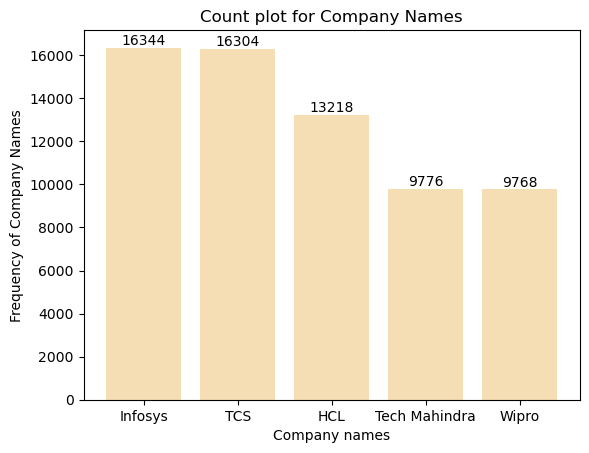

In [26]:
# Creating figure and axes to plot the graph
fig, ax = plt.subplots()

# Plotting Count plot
bars = ax.bar(df_IT_companies_data['Company_Name'].value_counts().index, df_IT_companies_data['Company_Name'].value_counts().values, color = 'wheat')

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Frequency of Company Names")

# Setting title
ax.set_title("Count plot for Company Names")

# Setting values on the bar
ax.bar_label(bars)

# Displaying the plot
plt.show()

**Interpretation**

We can say following things from the graph:

- **Infosys** is the company with the most data observations i.e. **16344** in the dataset.
- **TCS** is the company with the second most data observations i.e. **16304** in the dataset.
- **HCL** has **13218** data observations in the dataset.
- **Tech Mahindra** has the second least data observations i.e. **9776** in the dataset.
- **Wipro** has the least data observations i.e. **9768** in the dataset.

#### From this we can Interpret that the dataset is made up of with most of the records from **'Infosys'** and **'TCS'**.

#### 2. A Count plot for **`Fiscal_Year`** column.

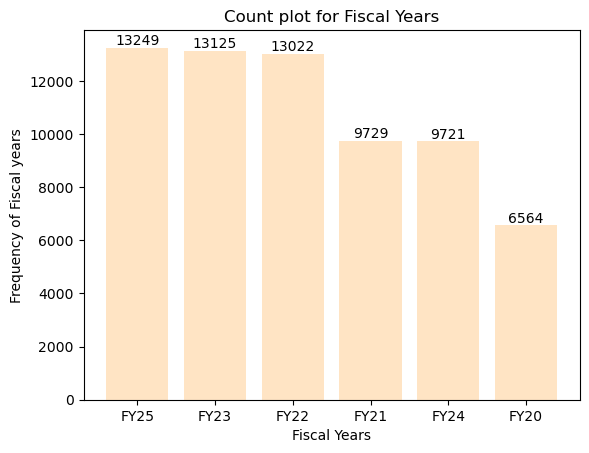

In [27]:
# Setting the figure and axes for the plot
fig, ax = plt.subplots()

# Plotting the graph
bars = ax.bar(df_IT_companies_data['Fiscal_Year'].value_counts().index, df_IT_companies_data['Fiscal_Year'].value_counts().values, color = 'bisque')

# Setting x axis' name
ax.set_xlabel("Fiscal Years")

# Setting y axis' name
ax.set_ylabel("Frequency of Fiscal years")

# Setting title
ax.set_title("Count plot for Fiscal Years")

# Setting bar values
ax.bar_label(bars)

# Display the plot
plt.show()

**Interpretation**

We can see following things from the graph:

- Most of the data records i.e. **13249** are from the Fiscal year **FY25**.
- Second most data records i.e. **13125** are from the Fiscal year **FY23**.
- We have **13022** data records from the Fiscal year **FY22**.
- We have **9729** data records from the Fiscal year **FY21**.
- We have **9721** data records from the Fiscal year **FY24**.
- Least of the data records i.e. **6564** are from the Fiscal year **FY22**.

#### From this we say that most of the dataset is constructed from the data of Fiscal Years **'FY25', 'FY23', 'FY22'**.

#### 3. A Count plot for **`Region`** column.

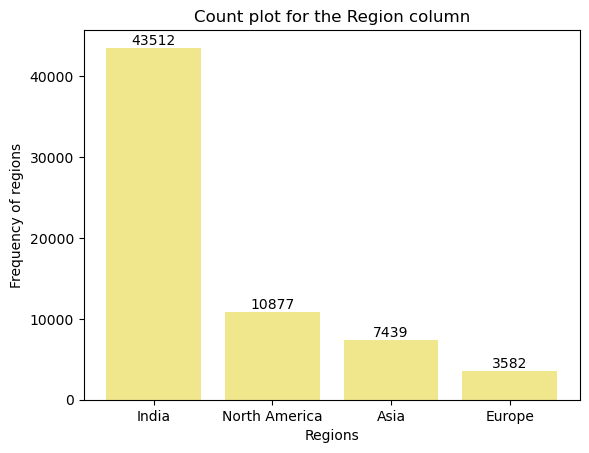

In [28]:
# Setting the figure and the axes
fig, ax = plt.subplots()

# Plotting the graph
bars = ax.bar(df_IT_companies_data['Region'].value_counts().index, df_IT_companies_data['Region'].value_counts().values, color = 'khaki')

# Setting the x axis' name
ax.set_xlabel("Regions")

# Setting the y axis' name
ax.set_ylabel("Frequency of regions")

# Setting the title for the graph
ax.set_title("Count plot for the Region column")

# Setting the values for the bars
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- Most of the the data records i.e. **43512** are collected from the **India** region.
- Second most data records i.e. **10877**are collected from the **North America** region.
- **7439** data records are collected from the **Asia** region.
- **3582** data records are collected from the **Europe** region.

#### From this we can say that most of dataset was collected from the **India** region.

#### 4. A Count plot for **`Data_Source`** column.

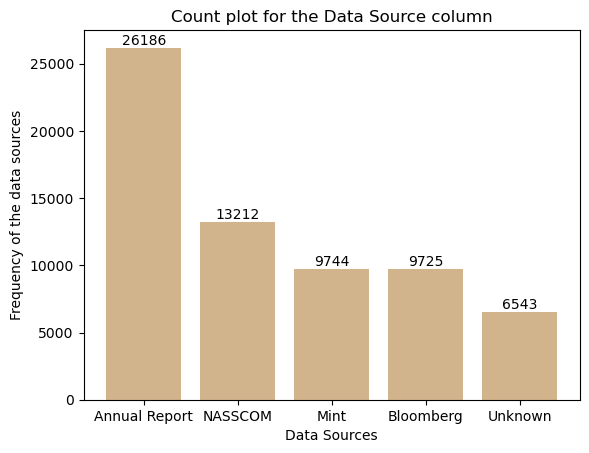

In [29]:
# Setting the figure and axes
fig, ax = plt.subplots()

# Plotting the graph
bars = ax.bar(df_IT_companies_data['Data_Source'].value_counts().index, df_IT_companies_data['Data_Source'].value_counts().values, color = 'tan')

# Setting x axis' name
ax.set_xlabel("Data Sources")

# Setting y axis' name
ax.set_ylabel("Frequency of the data sources")

# Setting title of the graph
ax.set_title("Count plot for the Data Source column")

# Setting the values for the bars
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **26186** data records are collected through **Annual Reports** of the companies.
- **13212** data records are collected through **NASSCOM** reports.
- **9744** data records are collected through **Mint** reports.
- **9725** data records are collected through **Bloomberg** reports.
- **6543** data records are collected through **Unknown** sources.

#### From this we can say that most of the data was collected through the **Annual Reports** of the company.

### 2) Graphs for Numerical variables

#### 1. Histrogram for **Revenue_Per_Employee_in_USD_Thousands** column

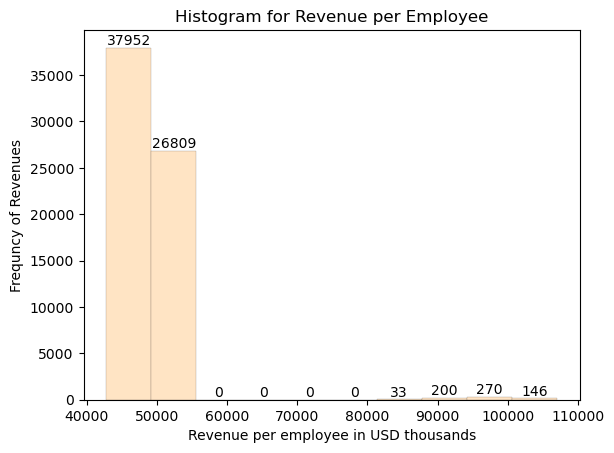

In [30]:
# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Revenue_Per_Employee_in_USD_Thousands'], color = 'bisque', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Revenue per employee in USD thousands")

# Setting y axis' name
ax.set_ylabel("Frequncy of Revenues")

# Setting title for the graph
ax.set_title("Histogram for Revenue per Employee")

# Setting the values for the bars
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **37952** records have **Revenue per Employee** between **42,000** to **49,000** dollars.
- **26809** records have **Revenue per Employee** between **49,000** to **55,000** dollars.
- **33** records have **Revenue per Employee** between **81,000** to **87,000** dollars.
- **200** records have **Revenue per Employee** between **87,000** to **94,000** dollars.
- **270** records have **Revenue per Employee** between **94,000** to **100,000** dollars.
- **26809** records have **Revenue per Employee** between **100,000** to **107,000** dollars.

#### From this we can say that for most of the data **Revenue per employee** for the companies lies between **42000** to **55000** dollars.

#### 2. Histrogram for **Total_Revenue_in_USD_Billions** column

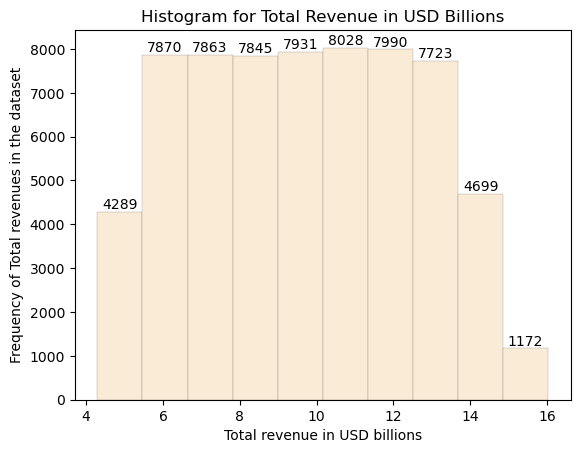

In [31]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Total_Revenue_in_USD_Billions'], color = 'antiquewhite', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Total revenue in USD billions")

# Setting y axis' name
ax.set_ylabel("Frequency of Total revenues in the dataset")

# Setting the title for the graph
ax.set_title("Histogram for Total Revenue in USD Billions")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph

- **4289** records are of Total revenue ranging between **4.29** to **5.464** Billion dollars.
- **7870** records are of Total revenue ranging between **5.464** to **6.638** Billion dollars.
- **7863** records are of Total revenue ranging between **6.638** to **7.812** Billion dollars.
- **7845** records are of Total revenue ranging between **7.812** to **8.986** Billion dollars.
- **7931** records are of Total revenue ranging between **8.986** to **10.16** Billion dollars.
- **8028** records are of Total revenue ranging between **10.16** to **11.334** Billion dollars.
- **7990** records are of Total revenue ranging between **11.334** to **12.508** Billion dollars.
- **7723** records are of Total revenue ranging between **12.508** to **13.682** Billion dollars.
- **4699** records are of Total revenue ranging between **13.682** to **14.856** Billion dollars.
- **7723** records are of Total revenue ranging between **14.856** to **16.03** Billion dollars.


#### From this we can say that for most of the records **Total Revenue** Ranges between **5.464** to **12.508** Billion dollars.

#### 3. Histrogram for **Employee_Count** column

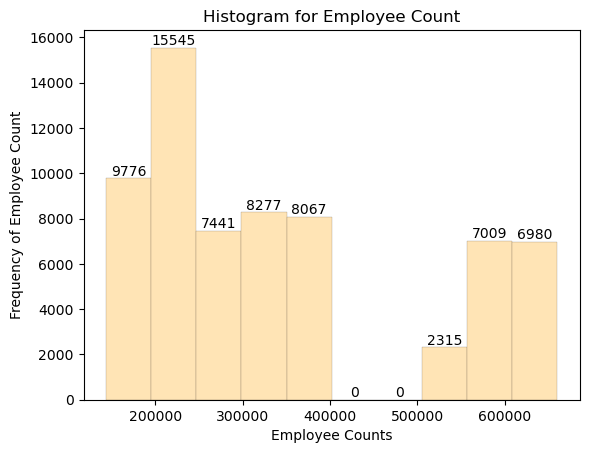

In [32]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Employee_Count'], color = 'moccasin', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Employee Counts")

# Setting the y axis' name
ax.set_ylabel("Frequency of Employee Count")

# Setting the title
ax.set_title("Histogram for Employee Count")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **9776** records have Employee counts ranging between **144,000** to **195,000**.
- **15545** records have Employee counts ranging between **195,000** to **247,000**.
- **7441** records have Employee counts ranging between **247,000** to **298,000**.
- **8277** records have Employee counts ranging between **298,000** to **350,000**.
- **8067** records have Employee counts ranging between **350,000** to **402,000**.
- **2315** records have Employee counts ranging between **505,000** to **556,000**.
- **7009** records have Employee counts ranging between **556,000** to **608,000**.
- **6980** records have Employee counts ranging between **608,000** to **659,000**.

#### From this we can say that for most of the records **Employee count** ranges between **144,000** to **402,000**.

#### 4. Histrogram for **Hiring_Rate_in_Percentage** column

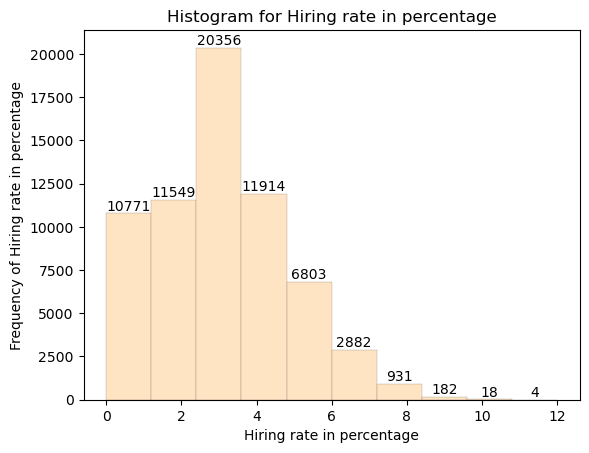

In [33]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Hiring_Rate_in_Percentage'], color = 'bisque', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Hiring rate in percentage")

# Setting the y axis' name
ax.set_ylabel("Frequency of Hiring rate in percentage")

# Setting the title
ax.set_title("Histogram for Hiring rate in percentage")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **10771** records have Hiring rate percentage ranging between **0** to **1.2** percent.
- **11549** records have Hiring rate percentage ranging between **1.2** to **2.4** percent.
- **20356** records have Hiring rate percentage ranging between **2.4** to **3.6** percent.
- **11914** records have Hiring rate percentage ranging between **3.6** to **4.8** percent.
- **6803** records have Hiring rate percentage ranging between **4.8** to **6** percent.
- **2882** records have Hiring rate percentage ranging between **6** to **7.2** percent.
- **931** records have Hiring rate percentage ranging between **7.2** to **8.4** percent.
- **182** records have Hiring rate percentage ranging between **8.4** to **9.6** percent.
- **18** records have Hiring rate percentage ranging between **9.6** to **10.8** percent.
- **4** records have Hiring rate percentage ranging between **10.8** to **12** percent.

#### From this we can say that for most of the records **Hiring rate** ranges between **0** to **4.8** percent. Meaning the companies **hired pretty less** for most of the records.

#### 5. Histrogram for **Attrition_Rate_in_Percentage** column

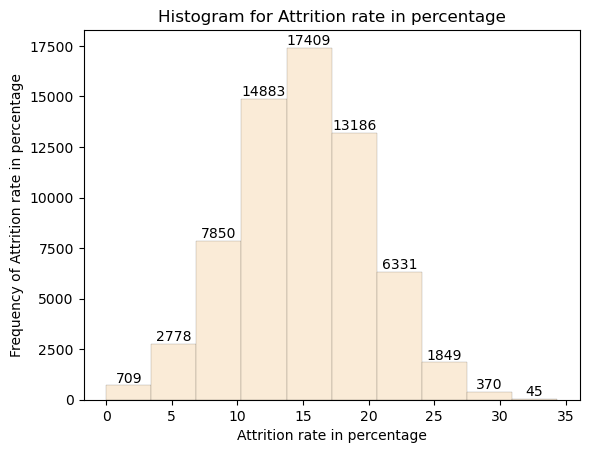

In [34]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Attrition_Rate_in_Percentage'], color = 'antiquewhite', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Attrition rate in percentage")

# Setting the y axis' name
ax.set_ylabel("Frequency of Attrition rate in percentage")

# Setting the title
ax.set_title("Histogram for Attrition rate in percentage")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **709** records have Attrition rate percentage ranging between **0** to **3.435** percent.
- **2778** records have Attrition rate percentage ranging between **3.345** to **6.87** percent.
- **7850** records have Attrition rate percentage ranging between **6.87** to **10.305** percent.
- **14883** records have Attrition rate percentage ranging between **10.305** to **13.74** percent.
- **17409** records have Attrition rate percentage ranging between **13.74** to **17.175** percent.
- **13186** records have Attrition rate percentage ranging between **17.175** to **20.61** percent.
- **6331** records have Attrition rate percentage ranging between **20.61** to **24.045** percent.
- **1849** records have Attrition rate percentage ranging between **24.045** to **27.48** percent.
- **370** records have Attrition rate percentage ranging between **27.48** to **30.915** percent.
- **45** records have Attrition rate percentage ranging between **30.915** to **34.35** percent.

#### From this we can say that for most of the records **Attrition rate** ranges between **10.305** to **20.61** percent.

#### 6. Histrogram for **Automation_Investment_in_USD_Millions** column.

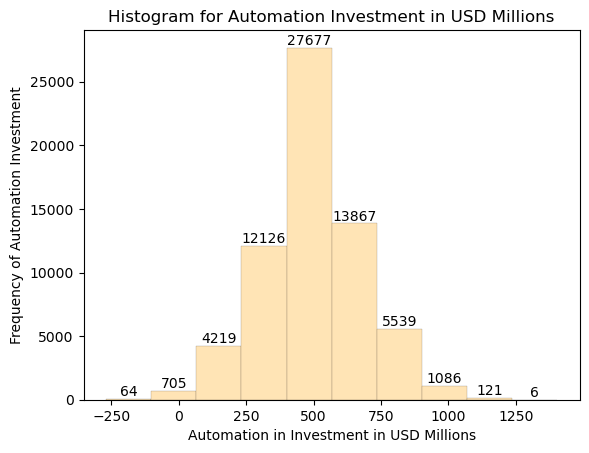

In [35]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Automation_Investment_in_USD_Millions'], color = 'moccasin', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Automation in Investment in USD Millions")

# Setting the y axis' name
ax.set_ylabel("Frequency of Automation Investment")

# Setting the title
ax.set_title("Histogram for Automation Investment in USD Millions")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **64** records have Automation Investment ranging between **-269.59** to **-102.283** Million dollars.
- **705** records have Automation Investment ranging between **-102.283** to **65.024** Million dollars.
- **4219** records have Automation Investment ranging between **65.024** to **232.331** Million dollars.
- **12126** records have Automation Investment ranging between **232.331** to **399.638** Million dollars.
- **27677** records have Automation Investment ranging between **399.638** to **566.945** Million dollars.
- **13867** records have Automation Investment ranging between **566.945** to **734.252** Million dollars.
- **5539** records have Automation Investment ranging between **734.252** to **901.559** Million dollars.
- **1086** records have Automation Investment ranging between **901.559** to **1068.866** Million dollars.
- **121** records have Automation Investment ranging between **1068.866** to **1236.173** Million dollars.
- **6** records have Automation Investment ranging between **1236.173** to **1403.48** Million dollars.

#### From this we can say that for most of the records **Automation Investment** ranges between **232.331** to **734.252** Million dollars.

#### 7. Histrogram for **Automation_Level_in_Percentage** column.

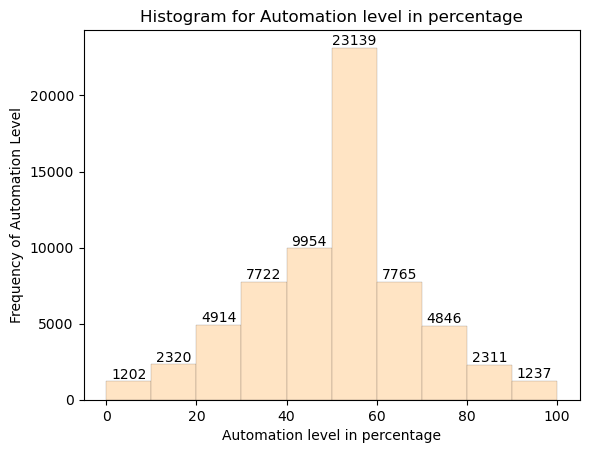

In [36]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Automation_Level_in_Percentage'], color = 'bisque', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Automation level in percentage")

# Setting the y axis' name
ax.set_ylabel("Frequency of Automation Level")

# Setting the title
ax.set_title("Histogram for Automation level in percentage")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **1202** records have Automation Level ranging between **0** to **10** percent.
- **2320** records have Automation Level ranging between **10** to **20** percent.
- **4914** records have Automation Level ranging between **20** to **30** percent.
- **7722** records have Automation Level ranging between **30** to **40** percent.
- **9954** records have Automation Level ranging between **40** to **50** percent.
- **23139** records have Automation Level ranging between **50** to **60** percent.
- **7765** records have Automation Level ranging between **60** to **70** percent.
- **4846** records have Automation Level ranging between **70** to **80** percent.
- **2311** records have Automation Level ranging between **80** to **90** percent.
- **1237** records have Automation Level ranging between **90** to **100** percent.

#### From this we can say that for most of the records **Automation Level** ranges between **30** to **70** percent.

#### 8. Histrogram for **Software_Sales_Revenue_in_USD_Millions** column.

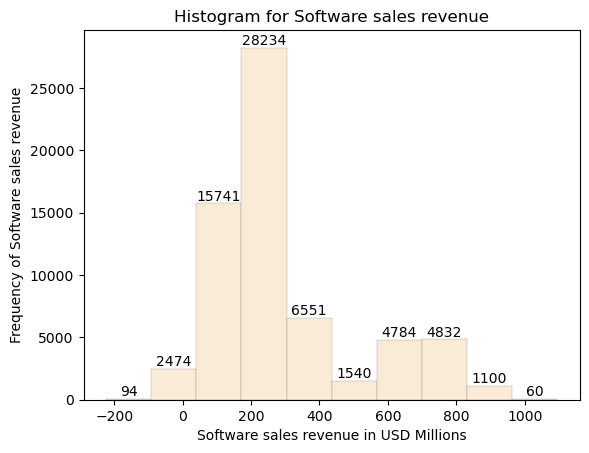

In [37]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Software_Sales_Revenue_in_USD_Millions'], color = 'antiquewhite', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Software sales revenue in USD Millions")

# Setting the y axis' name
ax.set_ylabel("Frequency of Software sales revenue")

# Setting the title
ax.set_title("Histogram for Software sales revenue")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **94** records have Software sales revenue ranging between **-223.23** to **-91.466** Million dollars.
- **2474** records have Software sales revenue ranging between **-91.466** to **40.298** Million dollars.
- **15741** records have Software sales revenue ranging between **40.298** to **172.062** Million dollars.
- **28234** records have Software sales revenue ranging between **172.062** to **303.826** Million dollars.
- **6551** records have Software sales revenue ranging between **303.826** to **435.59** Million dollars.
- **1540** records have Software sales revenue ranging between **435.59** to **567.354** Million dollars.
- **4784** records have Software sales revenue ranging between **567.354** to **699.118** Million dollars.
- **4832** records have Software sales revenue ranging between **699.118** to **830.882** Million dollars.
- **1100** records have Software sales revenue ranging between **830.882** to **962.646** Million dollars.
- **60** records have Software sales revenue ranging between **962.646** to **1094.41** Million dollars.

#### From this we can say that for most of the records **Software Sales Revenue** ranges between **40.298** to **303.826** Million dollars.

#### 9. Histrogram for **Deal_Wins_in_USD_Billions** column.

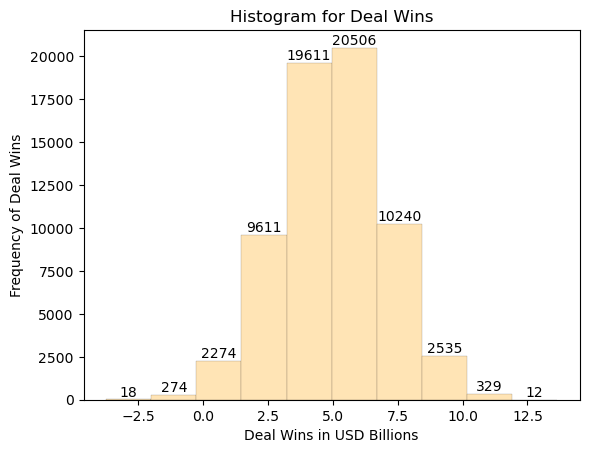

In [38]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Deal_Wins_in_USD_Billions'], color = 'moccasin', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Deal Wins in USD Billions")

# Setting the y axis' name
ax.set_ylabel("Frequency of Deal Wins")

# Setting the title
ax.set_title("Histogram for Deal Wins")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **18** records have Deal Wins ranging between **-3.72** to **-1.984** Billion dollars.
- **274** records have Deal Wins ranging between **-1.984** to **-0.248** Billion dollars.
- **2274** records have Deal Wins ranging between **-0.248** to **1.488** Billion dollars.
- **9611** records have Deal Wins ranging between **1.488** to **3.224** Billion dollars.
- **19611** records have Deal Wins ranging between **3.224** to **4.96** Billion dollars.
- **20506** records have Deal Wins ranging between **4.96** to **6.696** Billion dollars.
- **10240** records have Deal Wins ranging between **6.696** to **8.432** Billion dollars.
- **2535** records have Deal Wins ranging between **8.432** to **10.168** Billion dollars.
- **329** records have Deal Wins ranging between **10.168** to **11.904** Billion dollars.
- **12** records have Deal Wins ranging between **11.904** to **13.64** Billion dollars.

#### From this we can say that for most of the records **Deal Wins** ranges between **1.488** to **8.432** Billion dollars.

#### 10. Histrogram for **BFSI_Revenue_Share_in_Percentage** column.

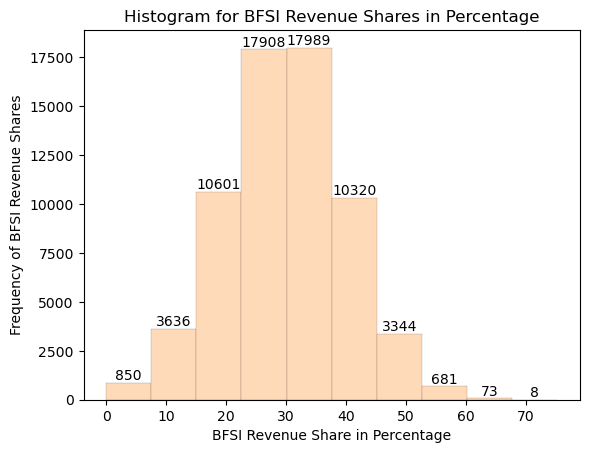

In [39]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['BFSI_Revenue_Share_in_Percentage'], color = 'peachpuff', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("BFSI Revenue Share in Percentage")

# Setting the y axis' name
ax.set_ylabel("Frequency of BFSI Revenue Shares")

# Setting the title
ax.set_title("Histogram for BFSI Revenue Shares in Percentage")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **850** records have BFSI Revenue Share in Percentage ranging between **0** to **7.524** percent.
- **3636** records have BFSI Revenue Share in Percentage ranging between **7.524** to **15.048** percent.
- **10601** records have BFSI Revenue Share in Percentage ranging between **15.048** to **22.572** percent.
- **17908** records have BFSI Revenue Share in Percentage ranging between **22.572** to **30.096** percent.
- **17989** records have BFSI Revenue Share in Percentage ranging between **30.096** to **37.62** percent.
- **10320** records have BFSI Revenue Share in Percentage ranging between **37.62** to **45.144** percent.
- **3344** records have BFSI Revenue Share in Percentage ranging between **45.144** to **52.668** percent.
- **681** records have BFSI Revenue Share in Percentage ranging between **52.668** to **60.192** percent.
- **73** records have BFSI Revenue Share in Percentage ranging between **60.192** to **67.716** percent.
- **8** records have BFSI Revenue Share in Percentage ranging between **67.716** to **75.24** percent.

#### From this we can say that for most of the records **BFSI Revenue Share in Percentage** ranges between **22.572** to **37.62** percent.

#### 11. Histrogram for **Global_IT_Spending_in_USD_Trillions** column.

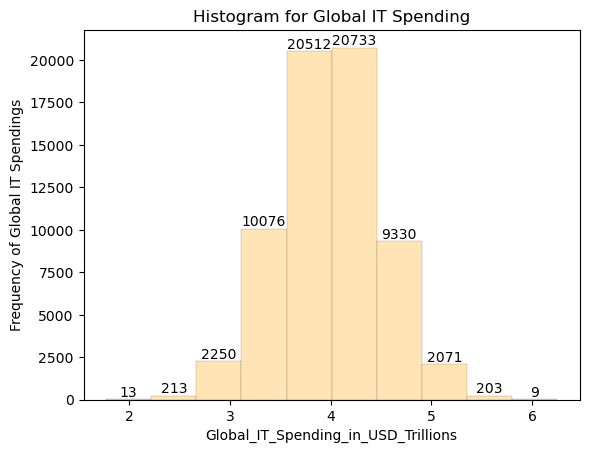

In [40]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Global_IT_Spending_in_USD_Trillions'], color = 'moccasin', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Global_IT_Spending_in_USD_Trillions")

# Setting the y axis' name
ax.set_ylabel("Frequency of Global IT Spendings")

# Setting the title
ax.set_title("Histogram for Global IT Spending")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **13** records have Global IT Spending ranging between **1.77** to **2.218** Trillion dollars.
- **213** records have Global IT Spending ranging between **2.218** to **2.666** Trillion dollars.
- **2250** records have Global IT Spending ranging between **2.666** to **3.114** Trillion dollars.
- **10076** records have Global IT Spending ranging between **3.114** to **3.562** Trillion dollars.
- **20512** records have Global IT Spending ranging between **3.562** to **4.01** Trillion dollars.
- **20733** records have Global IT Spending ranging between **4.01** to **4.458** Trillion dollars.
- **9330** records have Global IT Spending ranging between **4.458** to **4.906** Trillion dollars.
- **2071** records have Global IT Spending ranging between **4.906** to **5.354** Trillion dollars.
- **203** records have Global IT Spending ranging between **5.354** to **5.802** Trillion dollars.
- **9** records have Global IT Spending ranging between **5.802** to **6.25** Trillion dollars.

#### From this we can say that for most of the records **Global IT Spending** ranges between **3.562** to **4.458** Trillion dollars.

#### 12. Histrogram for **Global_GDP_Growth_Rate_in_Percentages** column.

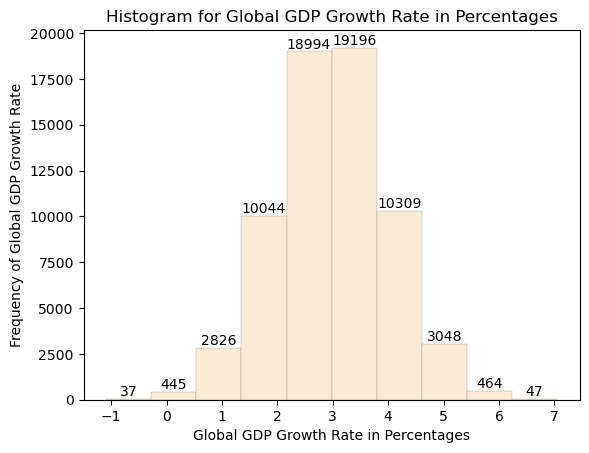

In [41]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Global_GDP_Growth_Rate_in_Percentages'], color = 'antiquewhite', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Global GDP Growth Rate in Percentages")

# Setting the y axis' name
ax.set_ylabel("Frequency of Global GDP Growth Rate")

# Setting the title
ax.set_title("Histogram for Global GDP Growth Rate in Percentages")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **37** records have Global GDP Growth Rate ranging between **-1.09** to **-0.276** percent.
- **445** records have Global GDP Growth Rate ranging between **-0.276** to **0.538** percent.
- **2826** records have Global GDP Growth Rate ranging between **0.538** to **1.352** percent.
- **10044** records have Global GDP Growth Rate ranging between **1.352** to **2.166** percent.
- **18994** records have Global GDP Growth Rate ranging between **2.166** to **2.98** percent.
- **19196** records have Global GDP Growth Rate ranging between **2.98** to **3.794** percent.
- **10309** records have Global GDP Growth Rate ranging between **3.794** to **4.608** percent.
- **3048** records have Global GDP Growth Rate ranging between **4.608** to **5.422** percent.
- **464** records have Global GDP Growth Rate ranging between **5.422** to **6.236** percent.
- **47** records have Global GDP Growth Rate ranging between **6.236** to **7.05** percent.

#### From this we can say that for most of the records **Global GDP Growth Rate** ranges between **2.166** to **3.794** percent.

#### 13. Histrogram for **Client_Retention_Rate_in_Percentage** column.

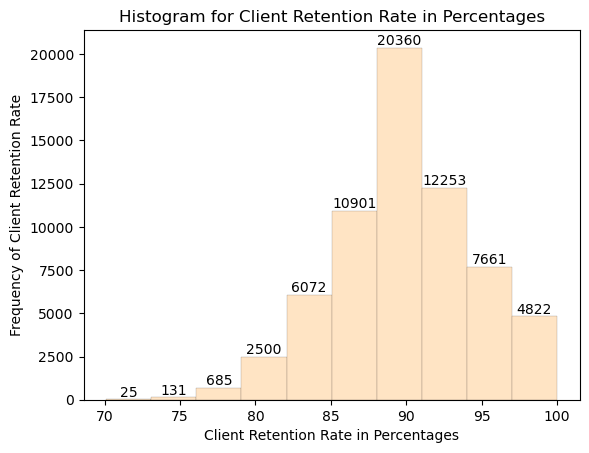

In [42]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Client_Retention_Rate_in_Percentage'], color = 'bisque', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Client Retention Rate in Percentages")

# Setting the y axis' name
ax.set_ylabel("Frequency of Client Retention Rate")

# Setting the title
ax.set_title("Histogram for Client Retention Rate in Percentages")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **25** records have Client Retention Rate ranging between **70.1** to **73.09** percent.
- **131** records have Client Retention Rate ranging between **73.09** to **76.08** percent.
- **685** records have Client Retention Rate ranging between **76.08** to **79.07** percent.
- **2500** records have Client Retention Rate ranging between **79.07** to **82.06** percent.
- **6072** records have Client Retention Rate ranging between **82.06** to **85.05** percent.
- **10901** records have Client Retention Rate ranging between **85.05** to **88.04** percent.
- **20360** records have Client Retention Rate ranging between **88.04** to **91.03** percent.
- **12253** records have Client Retention Rate ranging between **91.03** to **94.02** percent.
- **7661** records have Client Retention Rate ranging between **94.02** to **97.01** percent.
- **4822** records have Client Retention Rate ranging between **97.01** to **100** percent.

#### From this we can say that for most of the records **Client Retention Rate** ranges between **85.05** to **94.02** percent.

#### 14. Histrogram for **R_and_D_Spending_in_USD_Millions** column.

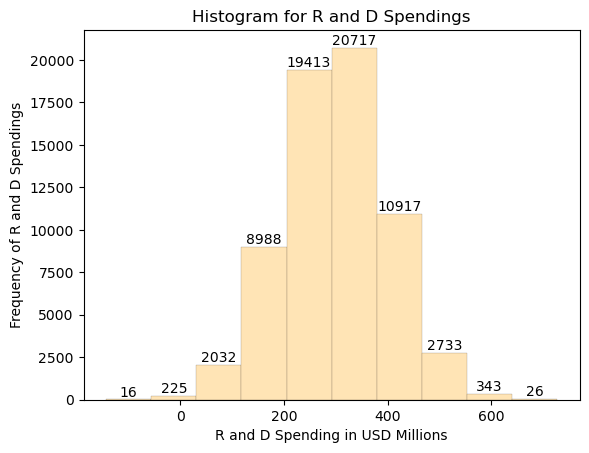

In [43]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['R_and_D_Spending_in_USD_Millions'], color = 'moccasin', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("R and D Spending in USD Millions")

# Setting the y axis' name
ax.set_ylabel("Frequency of R and D Spendings")

# Setting the title
ax.set_title("Histogram for R and D Spendings")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **16** records have R and D Spending ranging between **-142.77** to **-55.772** Million dollars.
- **225** records have R and D Spending ranging between **-55.772** to **31.226** Million dollars.
- **2032** records have R and D Spending ranging between **31.226** to **118.224** Million dollars.
- **8988** records have R and D Spending ranging between **118.224** to **205.222** Million dollars.
- **19413** records have R and D Spending ranging between **205.222** to **292.22** Million dollars.
- **20717** records have R and D Spending ranging between **292.22** to **379.218** Million dollars.
- **10917** records have R and D Spending ranging between **379.218** to **466.216** Million dollars.
- **2733** records have R and D Spending ranging between **466.216** to **553.214** Million dollars.
- **343** records have R and D Spending ranging between **553.214** to **640.212** Million dollars.
- **26** records have R and D Spending ranging between **640.212** to **727.21** Million dollars.

#### From this we can say that for most of the records **R and D Spending** ranges between **205.222** to **466.216** Million dollars.

#### 15. Histrogram for **Patent_Filings** column.

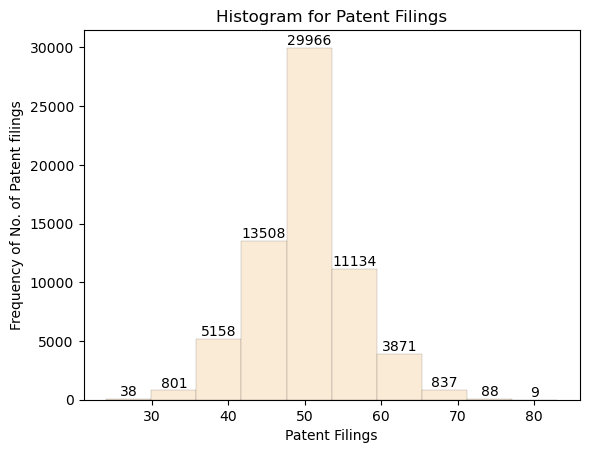

In [44]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Patent_Filings'], color = 'antiquewhite', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Patent Filings")

# Setting the y axis' name
ax.set_ylabel("Frequency of No. of Patent filings")

# Setting the title
ax.set_title("Histogram for Patent Filings")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **38** records have Patent Filings ranging between **24** to **29.9**.
- **801** records have Patent Filings ranging between **29.9** to **35.8**.
- **5158** records have Patent Filings ranging between **35.8** to **41.7**.
- **13508** records have Patent Filings ranging between **41.7** to **47.6**.
- **29966** records have Patent Filings ranging between **47.6** to **53.5**.
- **11134** records have Patent Filings ranging between **53.5** to **59.4**.
- **3871** records have Patent Filings ranging between **59.4** to **65.3**.
- **837** records have Patent Filings ranging between **65.3** to **71.2**.
- **88** records have Patent Filings ranging between **71.2** to **77.1**.
- **9** records have Patent Filings ranging between **77.1** to **83**.

#### From this we can say that for most of the records **Patent Filings** ranges between **41.7** to **59.4**.

#### 16. Histrogram for **Employee_Skill_Index_on_Scale_0_to_100** column.

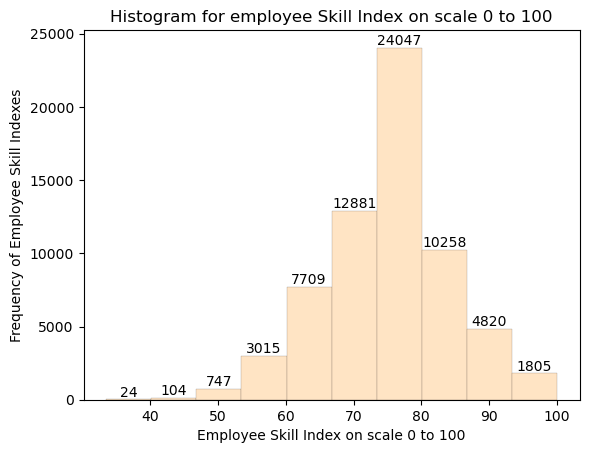

In [45]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Employee_Skill_Index_on_Scale_0_to_100'], color = 'bisque', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Employee Skill Index on scale 0 to 100")

# Setting the y axis' name
ax.set_ylabel("Frequency of Employee Skill Indexes")

# Setting the title
ax.set_title("Histogram for employee Skill Index on scale 0 to 100")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **24** records have Employee Skill Index ranging between **33.56** to **40.204** on the scale of 0 to 100.
- **104** records have Employee Skill Index ranging between **40.204** to **46.848** on the scale of 0 to 100.
- **747** records have Employee Skill Index ranging between **46.848** to **53.492** on the scale of 0 to 100.
- **3015** records have Employee Skill Index ranging between **53.492** to **60.136** on the scale of 0 to 100.
- **7709** records have Employee Skill Index ranging between **60.136** to **66.78** on the scale of 0 to 100.
- **12881** records have Employee Skill Index ranging between **66.78** to **73.424** on the scale of 0 to 100.
- **24047** records have Employee Skill Index ranging between **73.424** to **80.068** on the scale of 0 to 100.
- **10258** records have Employee Skill Index ranging between **80.068** to **86.712** on the scale of 0 to 100.
- **4820** records have Employee Skill Index ranging between **86.712** to **93.356** on the scale of 0 to 100.
- **1805** records have Employee Skill Index ranging between **93.356** to **100** on the scale of 0 to 100.

#### From this we can say that for most of the records **Employee Skill Index** ranges between **66.78** to **86.712** on the scale of 0 to 100.

#### 17. Histrogram for **Training_Hours_Per_Employee** column.

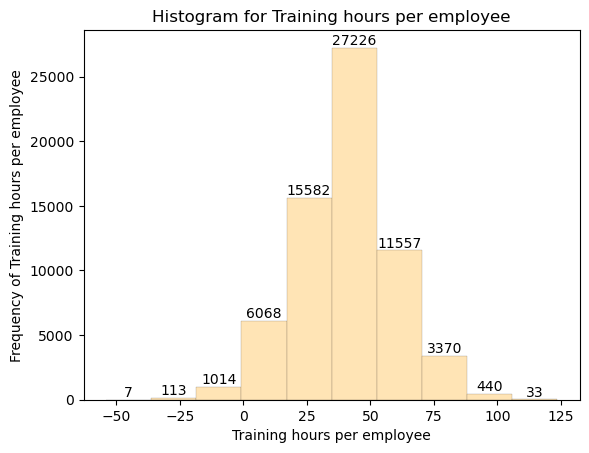

In [46]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Training_Hours_Per_Employee'], color = 'moccasin', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Training hours per employee")

# Setting the y axis' name
ax.set_ylabel("Frequency of Training hours per employee")

# Setting the title
ax.set_title("Histogram for Training hours per employee")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **7** records have Training hours per employee ranging between **-53.95** to **-36.204** hours.
- **113** records have Training hours per employee ranging between **-36.204** to **-18.458** hours.
- **1014** records have Training hours per employee ranging between **-18.458** to **-0.712** hours.
- **6068** records have Training hours per employee ranging between **-0.712** to **17.034** hours.
- **15582** records have Training hours per employee ranging between **17.034** to **34.78** hours.
- **27226** records have Training hours per employee ranging between **34.78** to **52.526** hours.
- **11557** records have Training hours per employee ranging between **52.526** to **70.272** hours.
- **3370** records have Training hours per employee ranging between **70.272** to **88.018** hours.
- **440** records have Training hours per employee ranging between **88.018** to **105.764** hours.
- **33** records have Training hours per employee ranging between **105.764** to **123.51** hours.

#### From this we can say that for most of the records **Training hours per employee** ranges between **17.034** to **70.272** hours.

#### 18. Histrogram for **Project_Delivery_Time_in_Months** column.

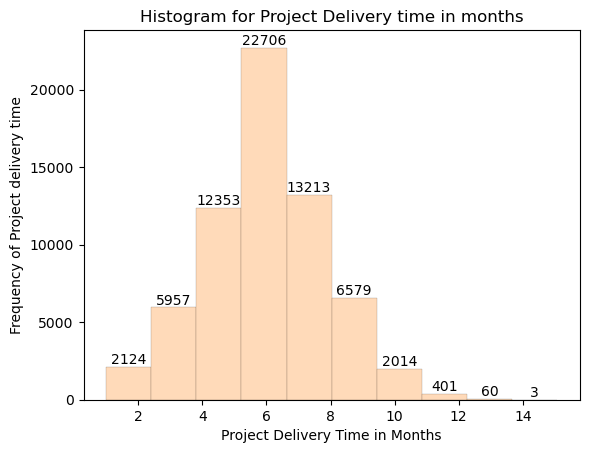

In [47]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Project_Delivery_Time_in_Months'], color = 'peachpuff', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Project Delivery Time in Months")

# Setting the y axis' name
ax.set_ylabel("Frequency of Project delivery time")

# Setting the title
ax.set_title("Histogram for Project Delivery time in months")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **2124** records have Project Delivery time ranging between **1** to **2.407** months.
- **5957** records have Project Delivery time ranging between **2.407** to **3.814** months.
- **12353** records have Project Delivery time ranging between **3.814** to **5.221** months.
- **22706** records have Project Delivery time ranging between **5.221** to **6.628** months.
- **13213** records have Project Delivery time ranging between **6.628** to **8.035** months.
- **6579** records have Project Delivery time ranging between **8.035** to **9.442** months.
- **2014** records have Project Delivery time ranging between **9.442** to **10.849** months.
- **401** records have Project Delivery time ranging between **10.849** to **12.256** months.
- **60** records have Project Delivery time ranging between **12.256** to **13.663** months.
- **3** records have Project Delivery time ranging between **13.663** to **15.07** months.

#### From this we can say that for most of the records **Project Delivery time** ranges between **12353** to **13213** months.

#### 19. Histrogram for **Exchange_Rate_of_INR_to_USD** column.

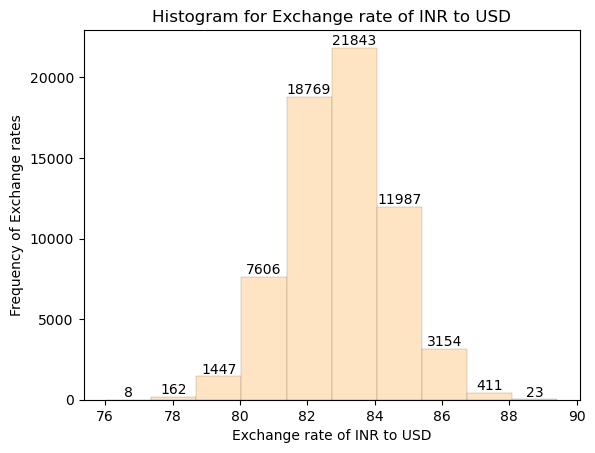

In [48]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Exchange_Rate_of_INR_to_USD'], color = 'bisque', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Exchange rate of INR to USD")

# Setting the y axis' name
ax.set_ylabel("Frequency of Exchange rates")

# Setting the title
ax.set_title("Histogram for Exchange rate of INR to USD")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **8** records have Exchange rate ranging between **76.03** to **77.369** INR to USD.
- **162** records have Exchange rate ranging between **7.369** to **78.808** INR to USD.
- **1447** records have Exchange rate ranging between **78.808** to **80.047** INR to USD.
- **7606** records have Exchange rate ranging between **80.047** to **81.386** INR to USD.
- **18769** records have Exchange rate ranging between **81.386** to **82.725** INR to USD.
- **21843** records have Exchange rate ranging between **82.725** to **84.064** INR to USD.
- **11987** records have Exchange rate ranging between **84.064** to **85.403** INR to USD.
- **3154** records have Exchange rate ranging between **85.403** to **86.742** INR to USD.
- **411** records have Exchange rate ranging between **86.742** to **88.081** INR to USD.
- **23** records have Exchange rate ranging between **88.081** to **89.42** INR to USD.

#### From this we can say that for most of the records **Exchange rate** ranges between **81.386** to **85.403** INR to USD.

#### 20. Histrogram for **Geopolitical_Risk_Index_on_Scale_0_to_100** column.

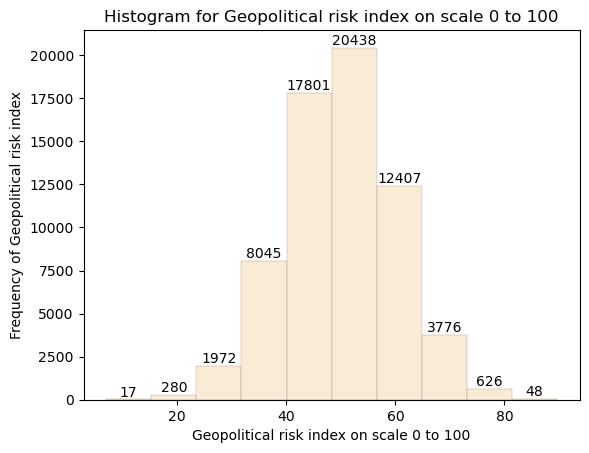

In [49]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Geopolitical_Risk_Index_on_Scale_0_to_100'], color = 'antiquewhite', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Geopolitical risk index on scale 0 to 100")

# Setting the y axis' name
ax.set_ylabel("Frequency of Geopolitical risk index")

# Setting the title
ax.set_title("Histogram for Geopolitical risk index on scale 0 to 100")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **17** records have Geopolitical risk index ranging between **6.95** to **15.221** on the scale of 0 to 100.
- **280** records have Exchange rate ranging between **15.221** to **23.492** on the scale of 0 to 100.
- **1972** records have Exchange rate ranging between **23.492** to **31.763** on the scale of 0 to 100.
- **8045** records have Exchange rate ranging between **31.763** to **40.034** on the scale of 0 to 100.
- **17801** records have Exchange rate ranging between **40.034** to **48.305** on the scale of 0 to 100.
- **20438** records have Exchange rate ranging between **48.305** to **56.576** on the scale of 0 to 100.
- **12407** records have Exchange rate ranging between **56.576** to **64.847** on the scale of 0 to 100.
- **3776** records have Exchange rate ranging between **64.847** to **73.118** on the scale of 0 to 100.
- **626** records have Exchange rate ranging between **73.118** to **81.389** on the scale of 0 to 100.
- **48** records have Exchange rate ranging between **81.389** to **89.66** on the scale of 0 to 100.

#### From this we can say that for most of the records **Geopolitical risk index** ranges between **40.034** to **64.847** on the scale of 0 to 100.

### 3) Graphs for Datetime variables

#### 1. Time series graph for **`Time`** column.

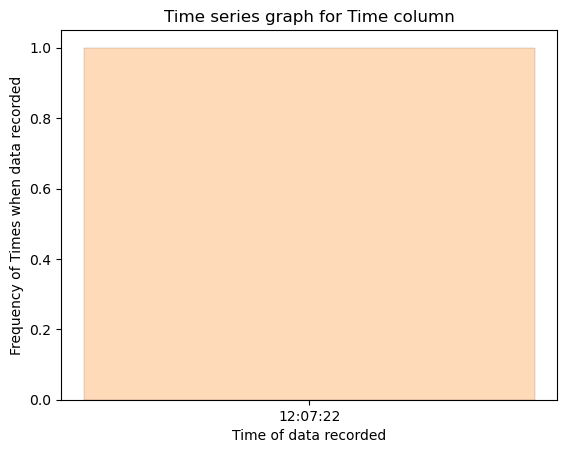

In [50]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
ax.bar(df_IT_companies_data['Time'].astype(str).value_counts().index, df_IT_companies_data['Time'].astype(str).value_counts(str).value_counts().values, color = 'peachpuff', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Time of data recorded")

# Setting the y axis' name
ax.set_ylabel("Frequency of Times when data recorded")

# Setting the title
ax.set_title("Time series graph for Time column")

# Displaying the graph
plt.show()

**Intrepretation**

Here we can all the data observations in our dataset were recorded on time **'12:07:22'**.

#### 2. Time series graph for **`Date`** column.

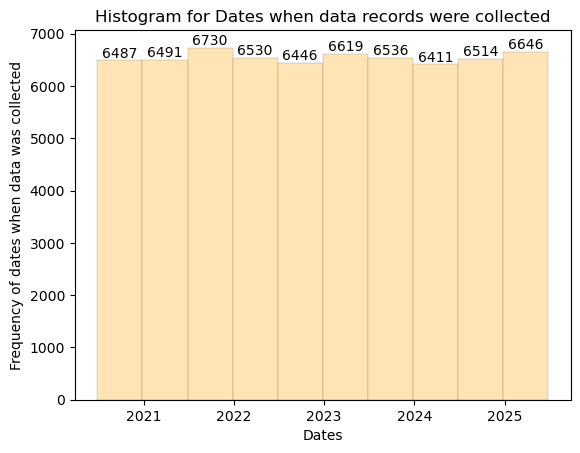

In [51]:
# Setting the figure and axes for the graph
fig, ax = plt.subplots()

# Plotting the graph
n, bins, patches = ax.hist(df_IT_companies_data['Date'], color = 'moccasin', edgecolor = 'black', linewidth = 0.1)

# Setting the x axis' name
ax.set_xlabel("Dates")

# Setting the y axis' name
ax.set_ylabel("Frequency of dates when data was collected")

# Setting the title
ax.set_title("Histogram for Dates when data records were collected")

# Setting the bar values
ax.bar_label(patches)

# Displaying the graph
plt.show()

**Interpretation**

We can say following things from the graph:

- **6487** records have Dates ranging between **2020** to **2021**.
- **6491** records have Dates ranging between **2021** to **2021-22**.
- **6730** records have Dates ranging between **2021-22** to **2022**.
- **6530** records have Dates ranging between **2022** to **2022-23**.
- **6446** records have Dates ranging between **2022-23** to **2023**.
- **6619** records have Dates ranging between **2023** to **2023-24**.
- **6536** records have Dates ranging between **2023-24** to **2024**.
- **6411** records have Dates ranging between **2024** to **2024-25**.
- **6514** records have Dates ranging between **2024-25** to **2025**.
- **6646** records have Dates ranging between **2025** to **2025**.

#### From this we can say that the **Dates** for all the records are dispersed equally among all the 6 years **2020, 2021, 2022, 2023, 2024, 2025**.

## b) Bivariate Analysis

### 1. Numerical, Numerical column pairs

In [52]:
# Making the correlation matrix to fetch out the pair of Numerical columns for performing Bivariate Analysis
df_IT_companies_data.select_dtypes(include = np.number).corr()

,Revenue_Per_Employee_in_USD_Thousands,Total_Revenue_in_USD_Billions,Employee_Count,Hiring_Rate_in_Percentage,Attrition_Rate_in_Percentage,Automation_Investment_in_USD_Millions,Automation_Level_in_Percentage,Software_Sales_Revenue_in_USD_Millions,Deal_Wins_in_USD_Billions,BFSI_Revenue_Share_in_Percentage,Global_IT_Spending_in_USD_Trillions,Global_GDP_Growth_Rate_in_Percentages,Client_Retention_Rate_in_Percentage,R_and_D_Spending_in_USD_Millions,Patent_Filings,Employee_Skill_Index_on_Scale_0_to_100,Training_Hours_Per_Employee,Project_Delivery_Time_in_Months,Exchange_Rate_of_INR_to_USD,Geopolitical_Risk_Index_on_Scale_0_to_100
Revenue_Per_Employee_in_USD_Thousands,1.000000,0.081913,0.096601,0.005525,-0.000513,-0.005100,-0.000989,0.124136,0.002619,0.006260,0.004169,0.004275,0.001005,-0.001695,0.003612,-0.002643,0.003322,0.000968,0.000801,0.001859
Total_Revenue_in_USD_Billions,0.081913,1.000000,0.038695,0.001579,0.008932,-0.000274,0.000366,0.049116,0.004528,-0.000700,-0.003285,0.002359,-0.000775,-0.000215,0.001638,-0.004515,0.004426,0.004915,0.003011,-0.001873
Employee_Count,0.096601,0.038695,1.000000,-0.001459,0.002131,-0.008550,-0.000857,-0.248813,0.003748,0.000550,-0.002503,-0.003965,0.008097,0.003226,0.003606,-0.000286,0.007613,0.001605,0.003445,-0.004177
Hiring_Rate_in_Percentage,0.005525,0.001579,-0.001459,1.000000,-0.003477,0.003676,0.007856,0.005754,0.001584,-0.001967,-0.004122,0.005943,0.001994,-0.003153,-0.001318,-0.002171,0.000373,-0.005670,0.004745,-0.001137
Attrition_Rate_in_Percentage,-0.000513,0.008932,0.002131,-0.003477,1.000000,-0.000594,-0.003195,0.002115,-0.001424,-0.002398,0.004973,0.008893,-0.001099,0.001965,-0.000614,-0.008072,-0.002449,0.000386,0.009107,0.004252
Automation_Investment_in_USD_Millions,-0.005100,-0.000274,-0.008550,0.003676,-0.000594,1.000000,0.004245,0.000471,0.004193,0.001539,-0.004372,0.003865,0.004547,-0.003975,0.000791,-0.006637,0.004886,0.004076,0.001368,0.004351
Automation_Level_in_Percentage,-0.000989,0.000366,-0.000857,0.007856,-0.003195,0.004245,1.000000,0.001176,-0.002322,-0.003533,-0.001576,-0.001205,0.006294,0.001258,0.002653,-0.004217,-0.000556,0.002567,0.005509,0.001094
Software_Sales_Revenue_in_USD_Millions,0.124136,0.049116,-0.248813,0.005754,0.002115,0.000471,0.001176,1.000000,-0.002496,-0.002255,0.001179,0.001129,-0.001276,-0.000794,0.000612,0.003532,-0.002700,0.001673,0.009732,0.000938
Deal_Wins_in_USD_Billions,0.002619,0.004528,0.003748,0.001584,-0.001424,0.004193,-0.002322,-0.002496,1.000000,0.012711,-0.004170,0.003668,0.002043,0.002470,0.001481,0.000276,0.006243,-0.005375,-0.001741,-0.003527
BFSI_Revenue_Share_in_Percentage,0.006260,-0.000700,0.000550,-0.001967,-0.002398,0.001539,-0.003533,-0.002255,0.012711,1.000000,-0.005206,0.001119,-0.005176,-0.001822,0.011378,0.000686,0.007258,-0.005692,0.000939,-0.006308


**Interpretation**

As there are too many columns we will make a heatmap to see the correlation pairs.

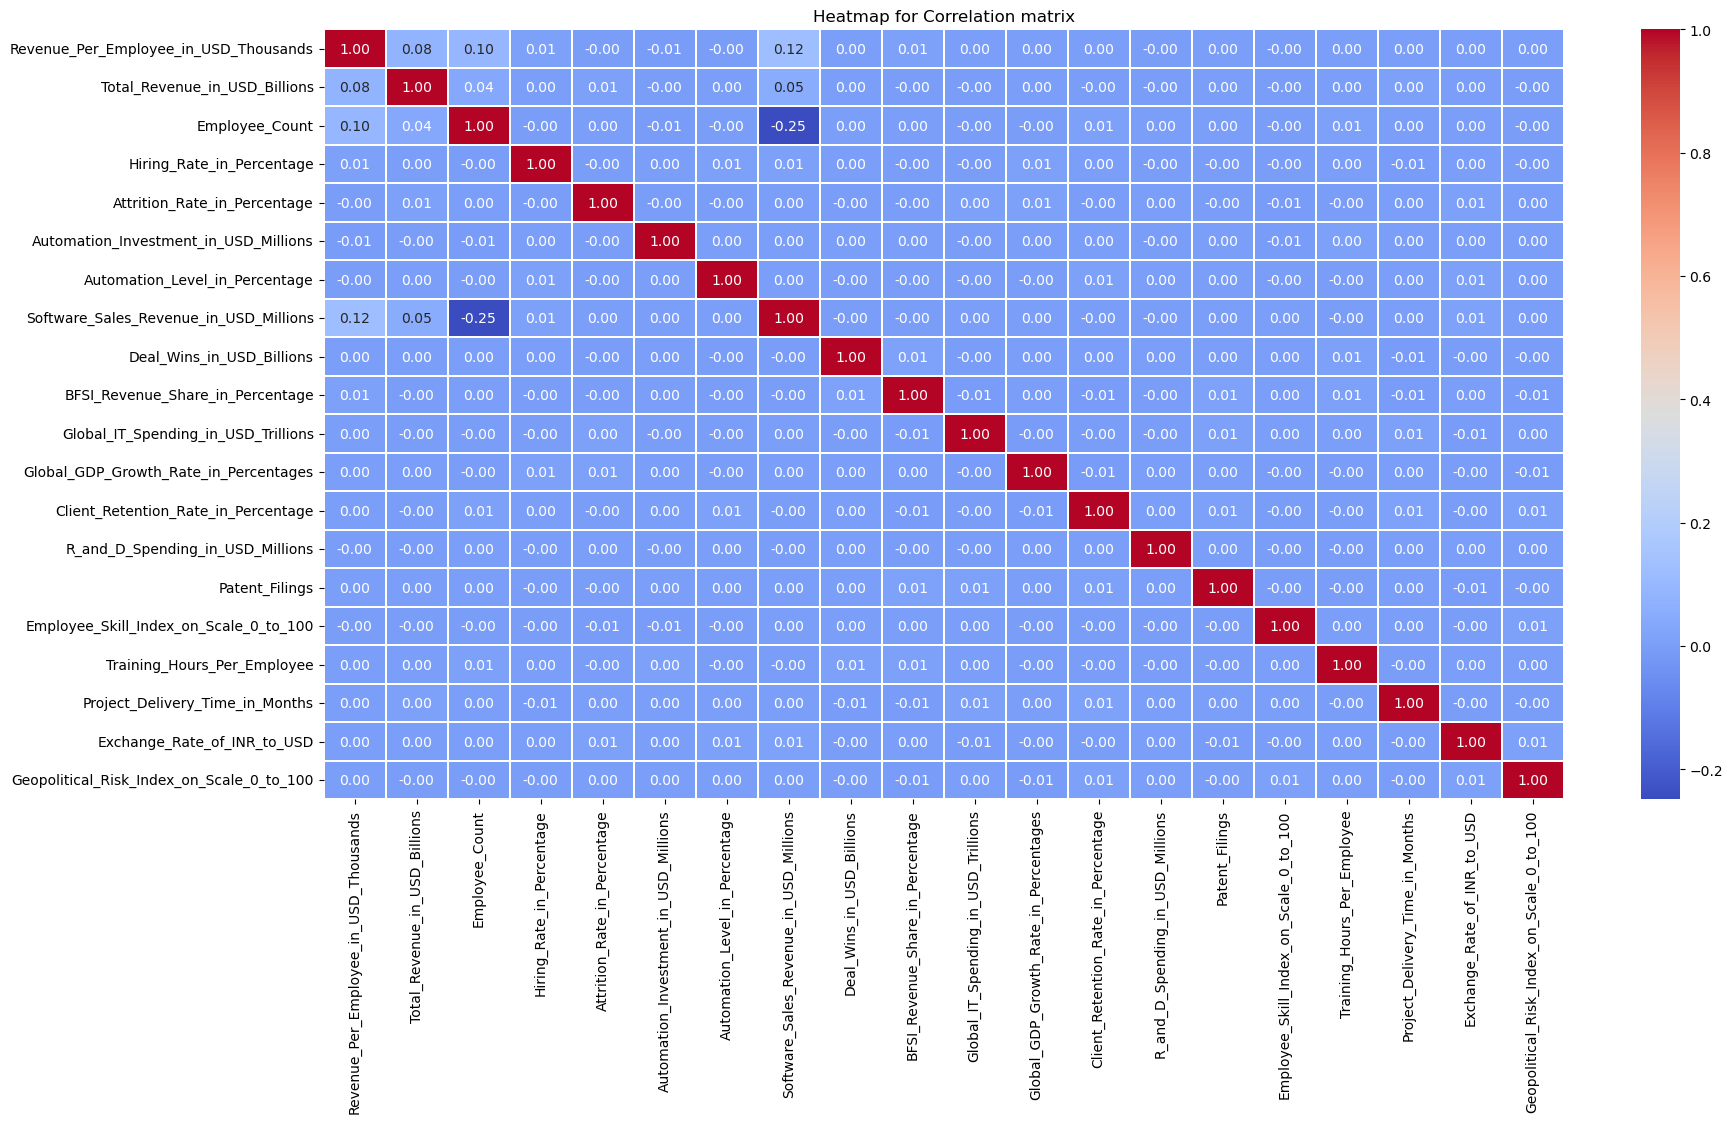

In [53]:
# Setting the figure
plt.figure(figsize = (20,10))

# Plotting the heatmap
sns.heatmap(df_IT_companies_data.select_dtypes(include = np.number).corr(), annot = True, cmap = "coolwarm", fmt = '.2f', linewidth = 0.01)

# Setting the title
plt.title("Heatmap for Correlation matrix")

# Displaying the graph
plt.show()

**Interpretation**

We can see here that there are no columns with correlation more than 0.7 meaning 70 percent. So we cannot obtain any Numerical columns pair to do visualization and perform Bivariate Analysis

### 2. Categorical, Categorical column pairs

Firstly we will make contigency table between two categorical columns and then run chi-square test over it to check whether the two columns are dependent of not. If they are then further proceed to do Bivariate analysis on them.

#### 1. **`Company_Name`** and **`Fiscal_Year`** columns pair.

In [54]:
# Making contingency table
contingency_table = pd.crosstab(df_IT_companies_data['Company_Name'], df_IT_companies_data['Fiscal_Year'])

In [55]:
# Running the chi-square test
chi2, p_value, dof, expected_frequencies = chi2_contingency(contingency_table)

In [56]:
# Checking the p value
p_value

0.2636193795012223

**Interpretation**

Here p-value is not less than significance level 0.05 meaning we fail to reject the null hypothesis, So what we mean by it is that columns **`Company_Name`** and **`Fiscal_Year`** are not dependent, so we won't do Bivariate analysis on them.

#### 2. **`Company_Name`** and **`Region`** columns pair.

In [57]:
# Making contingency table
contingency_table = pd.crosstab(df_IT_companies_data['Company_Name'], df_IT_companies_data['Region'])

In [58]:
# Running the chi-square test
chi2, p_value, dof, expected_frequencies = chi2_contingency(contingency_table)

In [59]:
# Checking the p value
p_value

0.5570627238283636

**Interpretation**

Here also p-value is not less than significance level 0.05 meaning we fail to reject the null hypothesis, So what we mean by it is that columns **`Company_Name`** and **`Region`** are not dependent, so we won't do Bivariate analysis on them.

#### 3. **`Company_Name`** and **`Data_Source`** columns pair.

In [60]:
# Making contingency table
contingency_table = pd.crosstab(df_IT_companies_data['Company_Name'], df_IT_companies_data['Data_Source'])

In [61]:
# Running the chi-square test
chi2, p_value, dof, expected_frequencies = chi2_contingency(contingency_table)

In [62]:
# Checking the p value
p_value

0.6328108154649493

**Interpretation**

Here also p-value is not less than significance level 0.05 meaning we fail to reject the null hypothesis, So what we mean by it is that columns **`Company_Name`** and **`Data_Source`** are not dependent, so we won't do Bivariate analysis on them.

#### 4. **`Fiscal_Year`** and **`Region`** columns pair.

In [63]:
# Making contingency table
contingency_table = pd.crosstab(df_IT_companies_data['Fiscal_Year'], df_IT_companies_data['Region'])

In [64]:
# Running the chi-square test
chi2, p_value, dof, expected_frequencies = chi2_contingency(contingency_table)

In [65]:
# Checking the p value
p_value

0.0065059919246166385

**Interpretation**

Here we can see that the p-value is less than significance level 0.05 meaning we reject the null hypothesis, So what we mean by it is that columns **`Fiscal_Year`** and **`Region`** are dependent, so we can do Bivariate analysis on them.

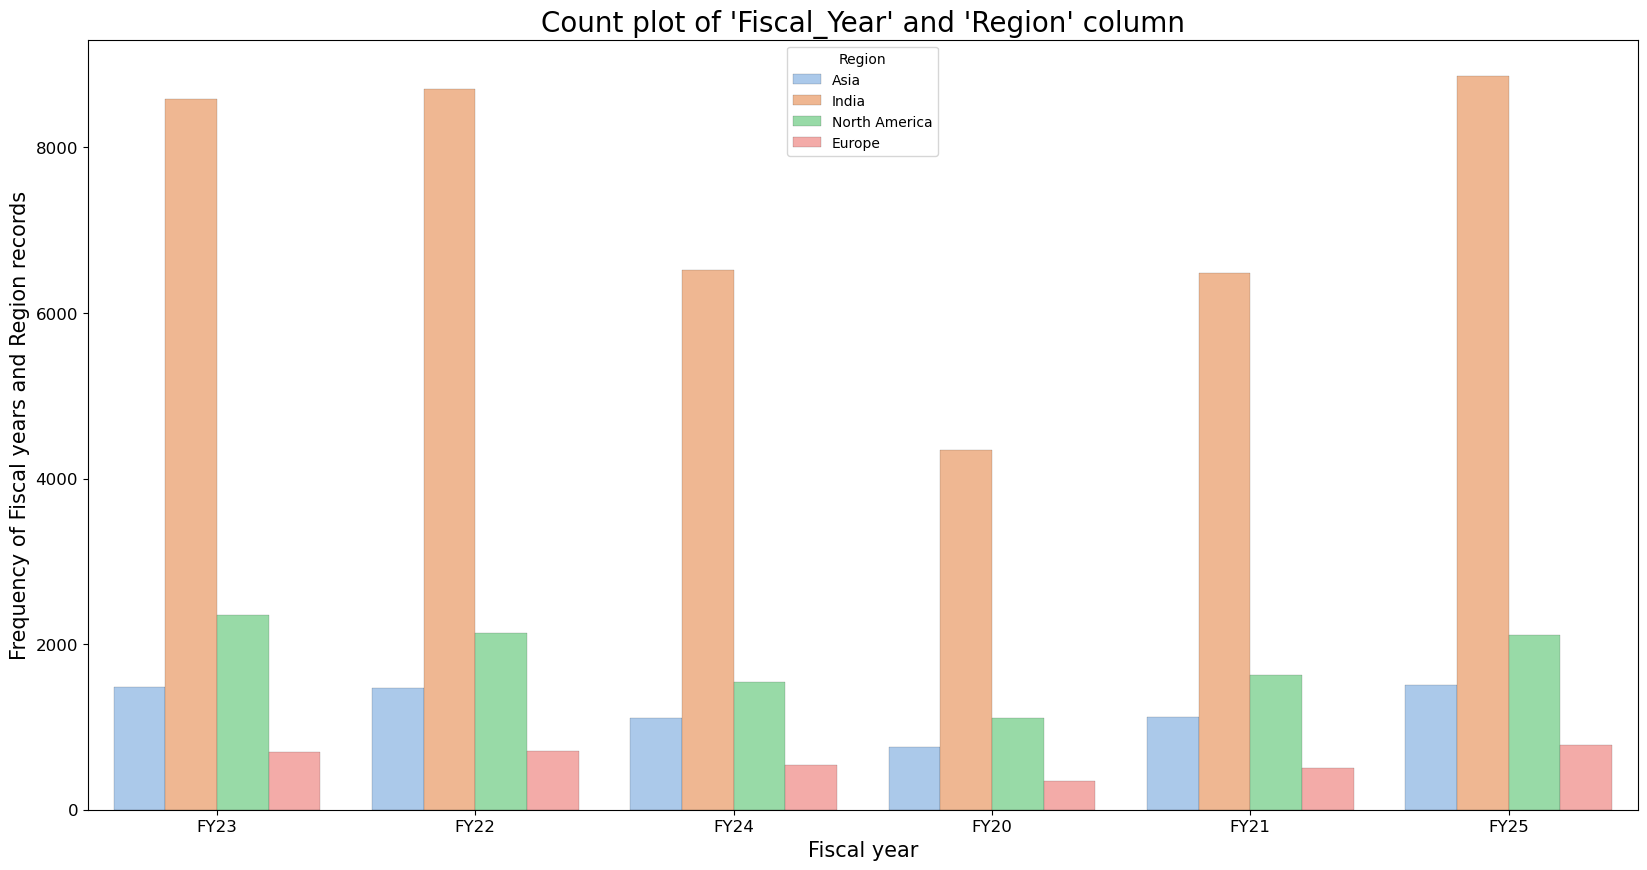

In [66]:
# Setting the figure for the graph
plt.figure(figsize = (20, 10))

# Plotting the Count plot for two categorical columns
sns.countplot(x = df_IT_companies_data['Fiscal_Year'], hue = df_IT_companies_data['Region'], palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Increasing fontsize
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# Setting x axis' name
plt.xlabel("Fiscal year", fontsize = 15)

# Setting y axis' name
plt.ylabel("Frequency of Fiscal years and Region records", fontsize = 15)

# Setting the title for the graph
plt.title("Count plot of 'Fiscal_Year' and 'Region' column",fontsize = 20)

# Displaying the graph
plt.show()

**Interpretation**

- From this graph we can Observe that for almost all the fiscal years most of the data records are from **India** region.
- And almost for all the fiscal years second most data records are from **North America** region.
- Similarly **Asia** is on third number and **Europe** is on fourth.

#### 5. **`Fiscal_Year`** and **`Data_Source`** columns pair.

In [67]:
# Making contingency table
contingency_table = pd.crosstab(df_IT_companies_data['Fiscal_Year'], df_IT_companies_data['Data_Source'])

In [68]:
# Running the chi-square test
chi2, p_value, dof, expected_frequencies = chi2_contingency(contingency_table)

In [69]:
# Checking the p value
p_value

0.5863605279132617

**Interpretation**

Here also p-value is not less than significance level 0.05 meaning we fail to reject the null hypothesis, So what we mean by it is that columns **`Fiscal_Year`** and **`Data_Source`** are not dependent, so we won't do Bivariate analysis on them.

#### 6. **`Region`** and **`Data_Source`** columns pair.

In [70]:
# Making contingency table
contingency_table = pd.crosstab(df_IT_companies_data['Region'], df_IT_companies_data['Data_Source'])

In [71]:
# Running the chi-square test
chi2, p_value, dof, expected_frequencies = chi2_contingency(contingency_table)

In [72]:
# Checking the p value
p_value

0.2995854728075367

**Interpretation**

Here also p-value is not less than significance level 0.05 meaning we fail to reject the null hypothesis, So what we mean by it is that columns **`Region`** and **`Data_Source`** are not dependent, so we won't do Bivariate analysis on them.

### 3. Numerical, categorical column pairs

#### 1. **`Revenue_Per_Employee_in_USD_Thousands`** and **`Company_Name`** columns pair.

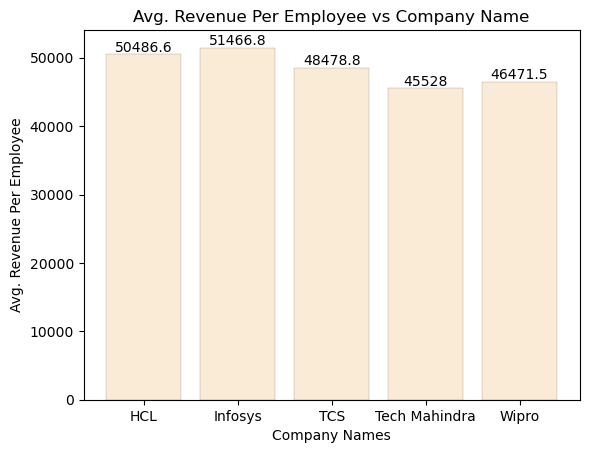

In [73]:
# 'Revenue_Per_Employee_in_USD_Thousands' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
average_revenue_per_employee_per_company = df_IT_companies_data.groupby('Company_Name')['Revenue_Per_Employee_in_USD_Thousands'].mean()

# Plotting the bar chart
bars = ax.bar(average_revenue_per_employee_per_company.index, average_revenue_per_employee_per_company.values, color = 'antiquewhite', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company Names")

# Setting y axis' name
ax.set_ylabel("Avg. Revenue Per Employee")

# Setting title
ax.set_title("Avg. Revenue Per Employee vs Company Name")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

- From this we can see that **Infosys** has the highest **Average Revenue per employee**.
- Similarly **HCL** has the second highest and **Tech Mahindra** has the lowest **Average Revenue per employee**.

#### 2. **`Total_Revenue`** and **`Company_Name`** columns pair.

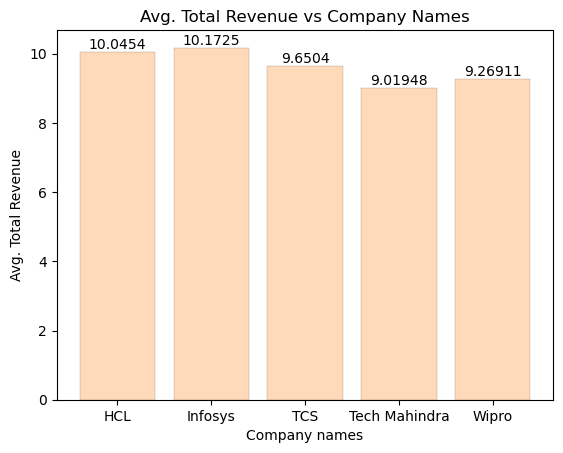

In [74]:
# 'Total_Revenue_in_USD_in_Billions' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
average_Total_revenue_per_company = df_IT_companies_data.groupby('Company_Name')['Total_Revenue_in_USD_Billions'].mean()

# Plotting the bar chart
bars = ax.bar(average_Total_revenue_per_company.index, average_Total_revenue_per_company.values, color = 'peachpuff', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. Total Revenue")

# Setting title
ax.set_title("Avg. Total Revenue vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

- From this we can see that **Infosys** has the highest **Avg. total revenue**.
- **HCL** has the second highest and **Tech Mahindra** has the lowest **Avg. total revenue**.

#### 3. **`Hiring_Rate_in_Percentage`** and **`Company_Name`** columns pair.

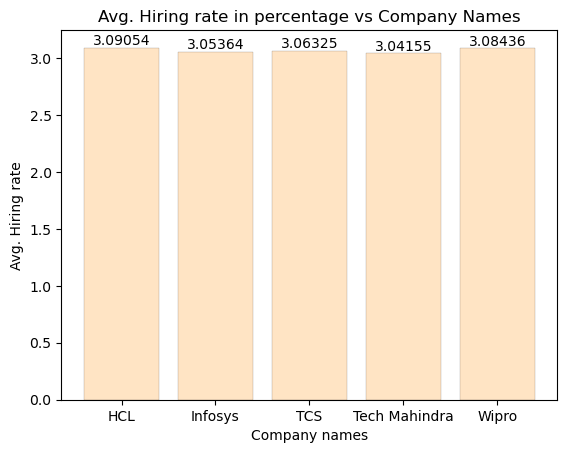

In [75]:
# 'Hiring_Rate_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
average_hiring_rate_in_percentage_per_company = df_IT_companies_data.groupby('Company_Name')['Hiring_Rate_in_Percentage'].mean()

# Plotting the bar chart
bars = ax.bar(average_hiring_rate_in_percentage_per_company.index, average_hiring_rate_in_percentage_per_company.values, color = 'bisque', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. Hiring rate")

# Setting title
ax.set_title("Avg. Hiring rate in percentage vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

We can see here that Average hiring rate in each company is similar only, it lies between **3** to **4** percent.

#### 4. **`Attrition_Rate_in_Percentage`** and **`Company_Name`** columns pair.

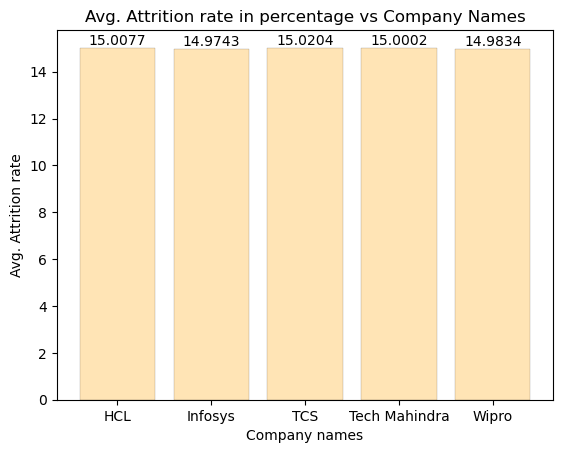

In [76]:
# 'Hiring_Rate_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
average_attrition_rate_in_percentage_per_company = df_IT_companies_data.groupby('Company_Name')['Attrition_Rate_in_Percentage'].mean()

# Plotting the bar chart
bars = ax.bar(average_attrition_rate_in_percentage_per_company.index, average_attrition_rate_in_percentage_per_company.values, color = 'moccasin', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. Attrition rate")

# Setting title
ax.set_title("Avg. Attrition rate in percentage vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

Again we can see that Attrition rate for all the companies is also similar, it lies between **15** to **16** percent

#### 5. **`Automation_Investment_in_USD_Millions`** and **`Company_Name`** columns pair.

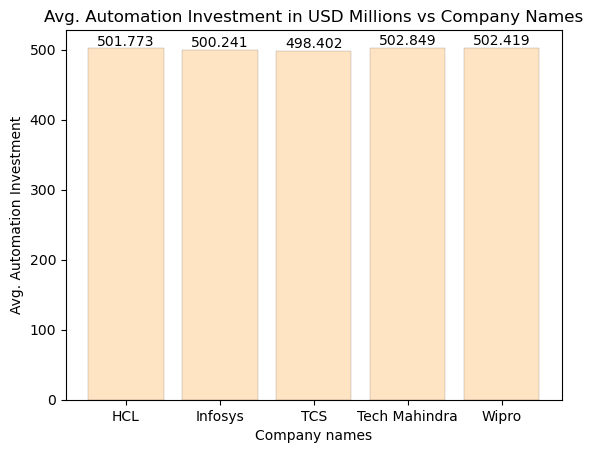

In [77]:
# 'Hiring_Rate_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
automation_investment_per_company = df_IT_companies_data.groupby('Company_Name')['Automation_Investment_in_USD_Millions'].mean()

# Plotting the bar chart
bars = ax.bar(automation_investment_per_company.index, automation_investment_per_company.values, color = 'bisque', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. Automation Investment")

# Setting title
ax.set_title("Avg. Automation Investment in USD Millions vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

We can see that Automation Investment is also pretty much same also for all the companies **Avg. Automation Investment** lies between **490** to **505** million dollars.

#### 6. **`Automation_Level_in_Percentage`** and **`Company_Name`** columns pair.

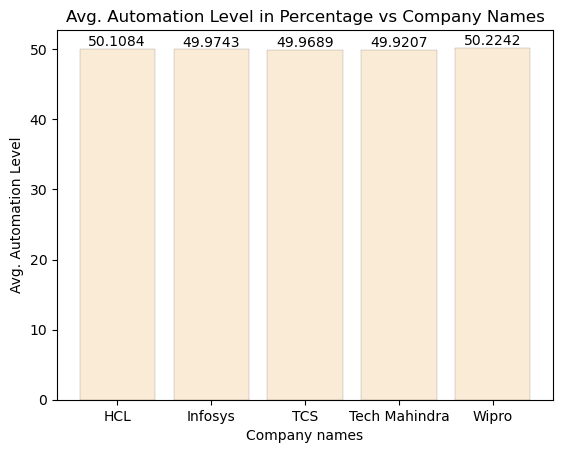

In [78]:
# 'Automation_Level_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
automation_per_company = df_IT_companies_data.groupby('Company_Name')['Automation_Level_in_Percentage'].mean()

# Plotting the bar chart
bars = ax.bar(automation_per_company.index, automation_per_company.values, color = 'antiquewhite', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. Automation Level")

# Setting title
ax.set_title("Avg. Automation Level in Percentage vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

**Avg. Automation Level** is similar for all the companies which lies between **48** to **51** percent.

#### 7. **`Software_Sales_Revenue_in_USD_Millions`** and **`Company_Name`** columns pair.

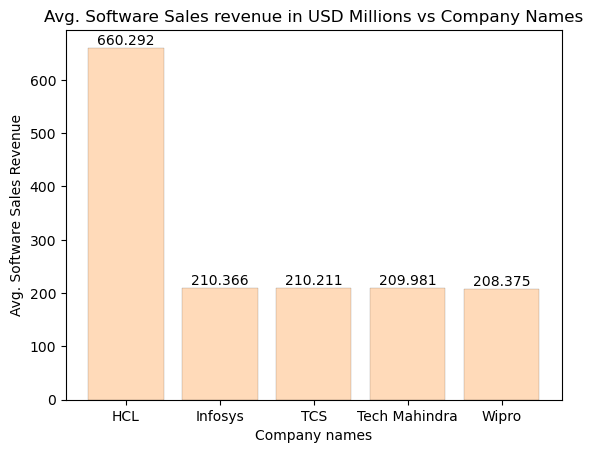

In [79]:
# 'Automation_Level_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
Software_sales_revenue_per_company = df_IT_companies_data.groupby('Company_Name')['Software_Sales_Revenue_in_USD_Millions'].mean()

# Plotting the bar chart
bars = ax.bar(Software_sales_revenue_per_company.index, Software_sales_revenue_per_company.values, color = 'peachpuff', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. Software Sales Revenue")

# Setting title
ax.set_title("Avg. Software Sales revenue in USD Millions vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that most of the **Avg. Software Sales Revenue** are done by **HCL**.
- And for rest of the columns **Avg. Software Sales Revenue** falls in similar range i.e. between **208** to **211** Million dollars.

#### 8. **`Deal_Wins_in_USD_Billions`** and **`Company_Name`** columns pair.

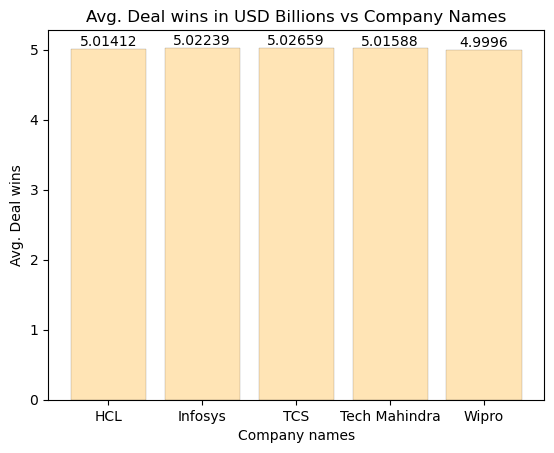

In [80]:
# 'Automation_Level_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
Deal_wins_per_company = df_IT_companies_data.groupby('Company_Name')['Deal_Wins_in_USD_Billions'].mean()

# Plotting the bar chart
bars = ax.bar(Deal_wins_per_company.index, Deal_wins_per_company.values, color = 'moccasin', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. Deal wins")

# Setting title
ax.set_title("Avg. Deal wins in USD Billions vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for almost all of the companies **Avg. Deal Wins** are similar, which lies between **4.8** to **5.3** Billion dollars.

#### 9. **`BFSI_Revenue_Share_in_Percentage`** and **`Company_Name`** columns pair.

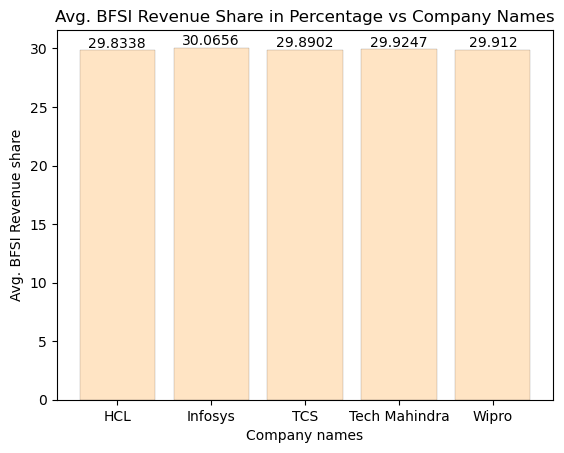

In [81]:
# 'Automation_Level_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
BFSI_revenue_per_company = df_IT_companies_data.groupby('Company_Name')['BFSI_Revenue_Share_in_Percentage'].mean()

# Plotting the bar chart
bars = ax.bar(BFSI_revenue_per_company.index, BFSI_revenue_per_company.values, color = 'bisque', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. BFSI Revenue share")

# Setting title
ax.set_title("Avg. BFSI Revenue Share in Percentage vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for almost all of the companies **Avg. BFSI Revenue share** is similar, which lies between **29.8** to **30.1** percent.

#### 10. **`R_and_D_Spending_in_USD_Millions`** and **`Company_Name`** columns pair.

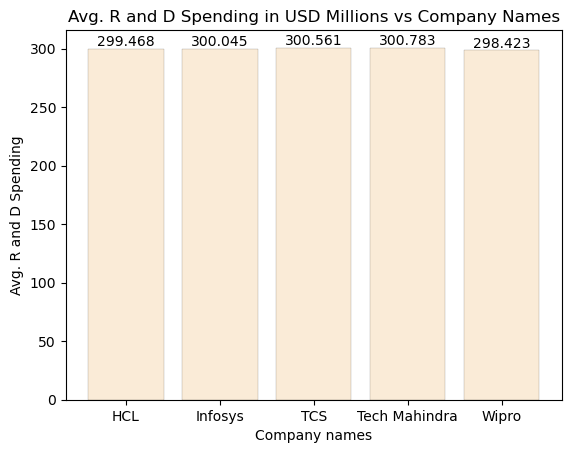

In [82]:
# 'Automation_Level_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
R_and_D_Spending_per_company = df_IT_companies_data.groupby('Company_Name')['R_and_D_Spending_in_USD_Millions'].mean()

# Plotting the bar chart
bars = ax.bar(R_and_D_Spending_per_company.index, R_and_D_Spending_per_company.values, color = 'antiquewhite', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. R and D Spending")

# Setting title
ax.set_title("Avg. R and D Spending in USD Millions vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for almost all of the companies **Avg. R and D Spending** is similar, which lies between **298.4** to **300.8** Million dollars.

#### 11. **`Patent_Filings`** and **`Company_Name`** columns pair.

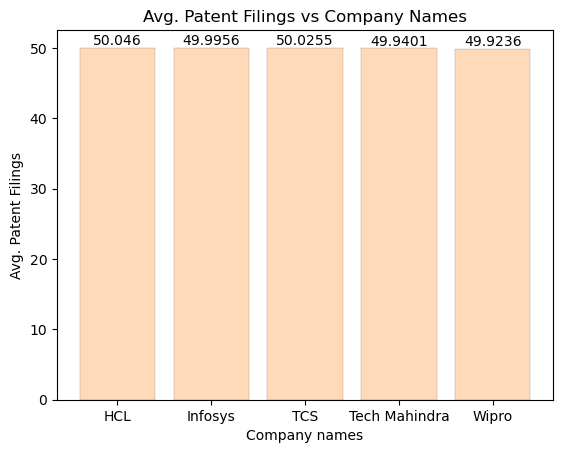

In [83]:
# 'Automation_Level_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
average_patent_filings_per_company = df_IT_companies_data.groupby('Company_Name')['Patent_Filings'].mean()

# Plotting the bar chart
bars = ax.bar(average_patent_filings_per_company.index, average_patent_filings_per_company.values, color = 'peachpuff', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. Patent Filings")

# Setting title
ax.set_title("Avg. Patent Filings vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for almost all of the companies **Avg. Patent Filings** is similar, which lies between **49.9** to **50.1**.

#### 12. **`Employee_Skill_Index_on_Scale_0_to_100`** and **`Company_Name`** columns pair.

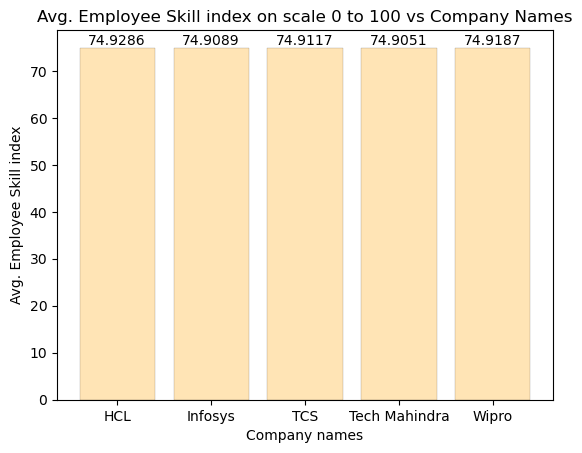

In [84]:
# 'Automation_Level_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
average_employee_skill_index_per_company = df_IT_companies_data.groupby('Company_Name')['Employee_Skill_Index_on_Scale_0_to_100'].mean()

# Plotting the bar chart
bars = ax.bar(average_employee_skill_index_per_company.index, average_employee_skill_index_per_company.values, color = 'moccasin', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. Employee Skill index")

# Setting title
ax.set_title("Avg. Employee Skill index on scale 0 to 100 vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for almost all of the companies **Avg. Employee Skill index** is similar, which lies between **74.90** to **74.93** on the scale of 0 to 100.

#### 13. **`Training_Hours_Per_Employee`** and **`Company_Name`** columns pair.

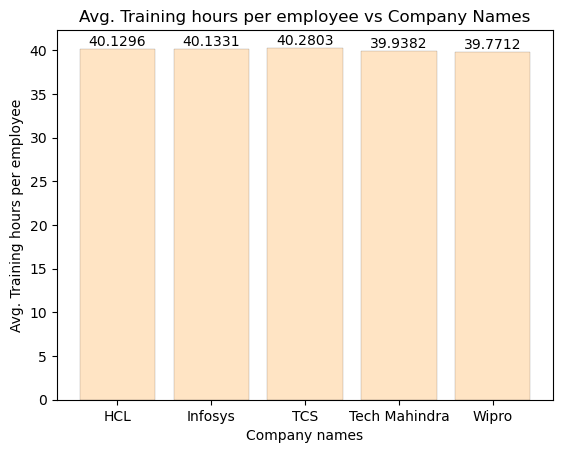

In [85]:
# 'Automation_Level_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
average_Training_hours_per_company = df_IT_companies_data.groupby('Company_Name')['Training_Hours_Per_Employee'].mean()

# Plotting the bar chart
bars = ax.bar(average_Training_hours_per_company.index, average_Training_hours_per_company.values, color = 'Bisque', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. Training hours per employee")

# Setting title
ax.set_title("Avg. Training hours per employee vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for almost all of the companies **Avg. Training hours per employee** is similar, which lies between **39.7** to **40.3**.

#### 14. **`Project_Delivery_Time_in_Months`** and **`Company_Name`** columns pair.

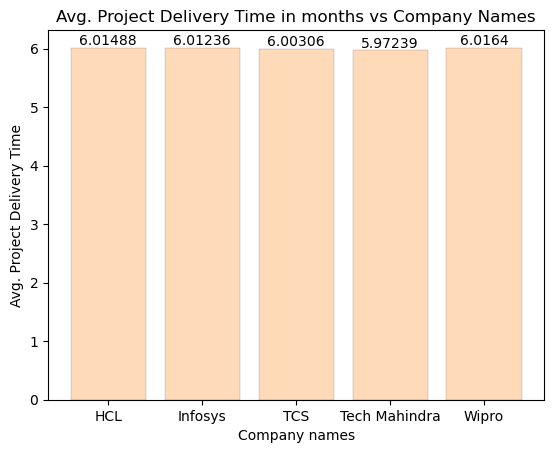

In [86]:
# 'Automation_Level_in_Percentage' column with 'Company_Name' column

# Setting figure and axes for the graph
fig, ax = plt.subplots()

# Making groups of data by categories
average_project_delivery_time_per_company = df_IT_companies_data.groupby('Company_Name')['Project_Delivery_Time_in_Months'].mean()

# Plotting the bar chart
bars = ax.bar(average_project_delivery_time_per_company.index, average_project_delivery_time_per_company.values, color = 'peachpuff', edgecolor = 'black', linewidth = 0.1)

# Setting x axis' name
ax.set_xlabel("Company names")

# Setting y axis' name
ax.set_ylabel("Avg. Project Delivery Time")

# Setting title
ax.set_title("Avg. Project Delivery Time in months vs Company Names")

# Putting values of the bar
ax.bar_label(bars)

# Displaying the graph
plt.show()

**Interpretation**

- We can see here that for almost all of the companies **Avg. Project Delivery Time** is similar, which lies between **5.9** to **6.015** months.

## c) Multivariate Analysis

### 1. Plotting a bar chart with **Avg. `Revenue_Per_Employee_in_USD_Thousands`** vs **`Company_Name`** and **`Fiscal_Year`**.

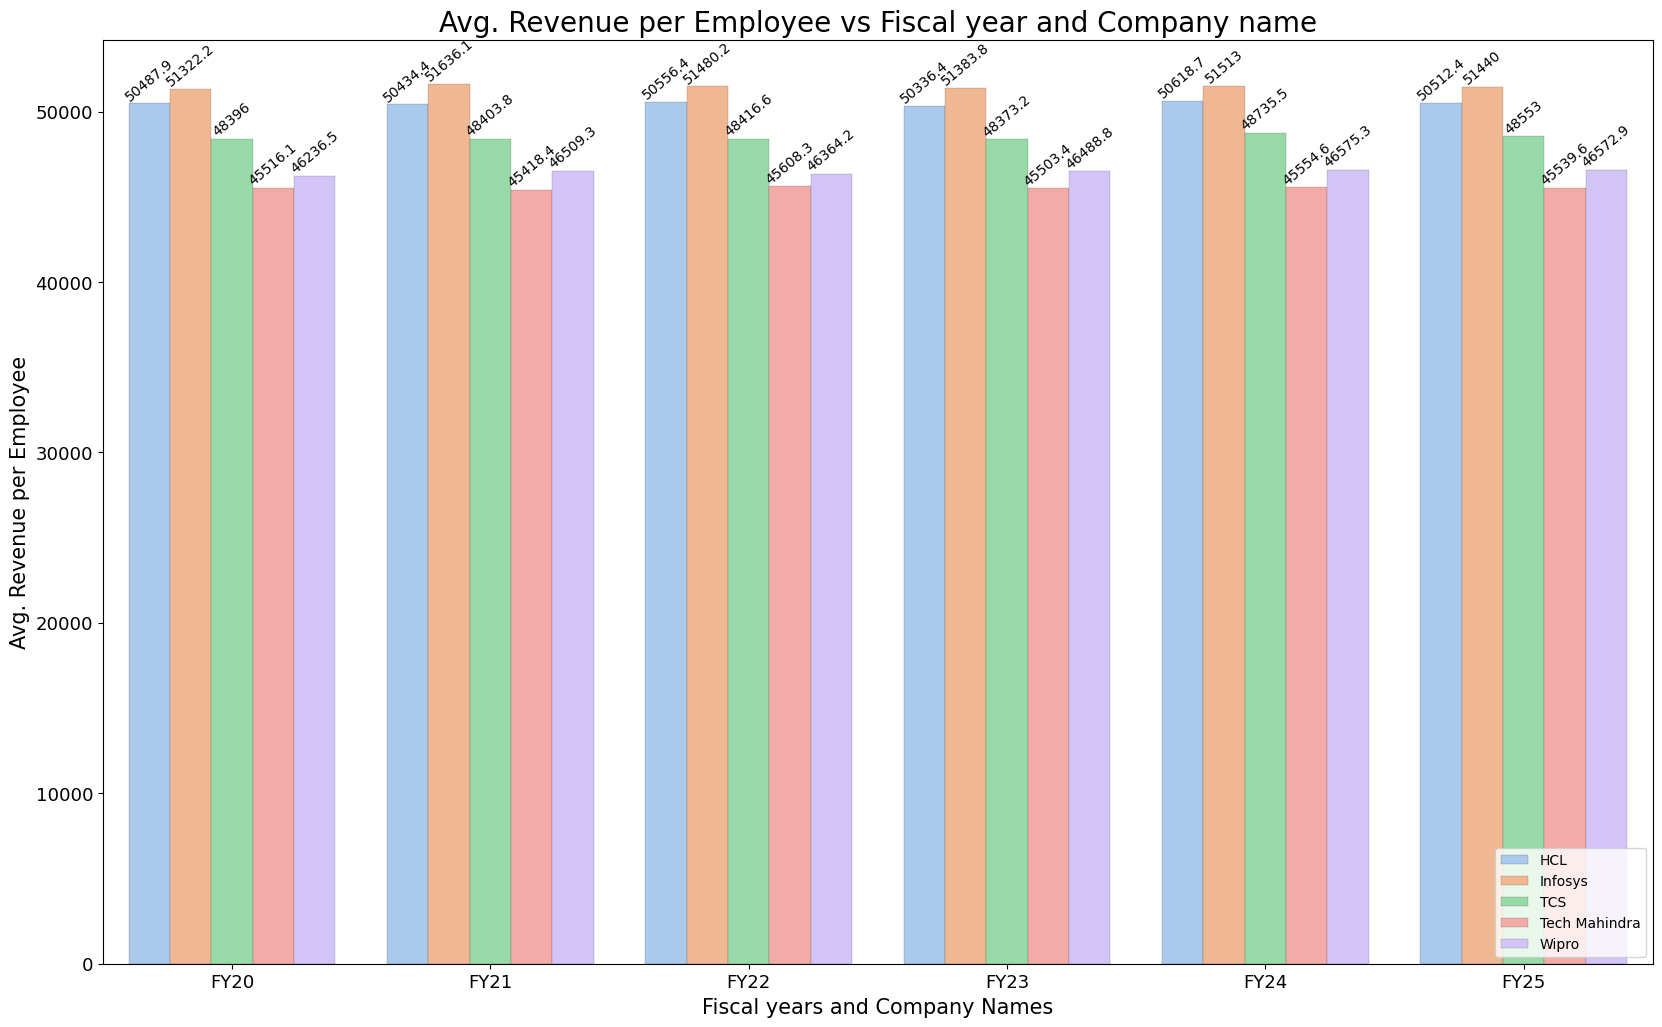

In [87]:
# Setting the figure for the graph
plt.figure(figsize = (20,12))

# Preparing the values for the graph
average_revenue_per_employee_per_company_name_and_fiscal_year = df_IT_companies_data.groupby(['Fiscal_Year', 'Company_Name'])['Revenue_Per_Employee_in_USD_Thousands'].mean().reset_index()

# Plotting the graph
ax = sns.barplot(x = 'Fiscal_Year', y = 'Revenue_Per_Employee_in_USD_Thousands' , hue = 'Company_Name', data = average_revenue_per_employee_per_company_name_and_fiscal_year, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the position of the legend
plt.legend(loc = "lower right")

# Setting the size for the text on the axis
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# Setting the x axis' name
plt.xlabel("Fiscal years and Company Names", fontsize = 15)

# Setting the y axis' name
plt.ylabel("Avg. Revenue per Employee", fontsize = 15)

# Setting title
plt.title("Avg. Revenue per Employee vs Fiscal year and Company name", fontsize = 20)

# Setting bar values
for container in ax.containers:
    ax.bar_label(container, fontsize = 10, rotation = 40)

# Displaying the graph
plt.show()

**Interpretation**

We can see here that for almost all the fiscal years the **average revenue per employee** for each has remain constant.

### 2. Plotting a bar chart with **Avg. `Total_Revenue_in_USD_Billions`** vs **`Company_Name`** and **`Fiscal_Year`**.

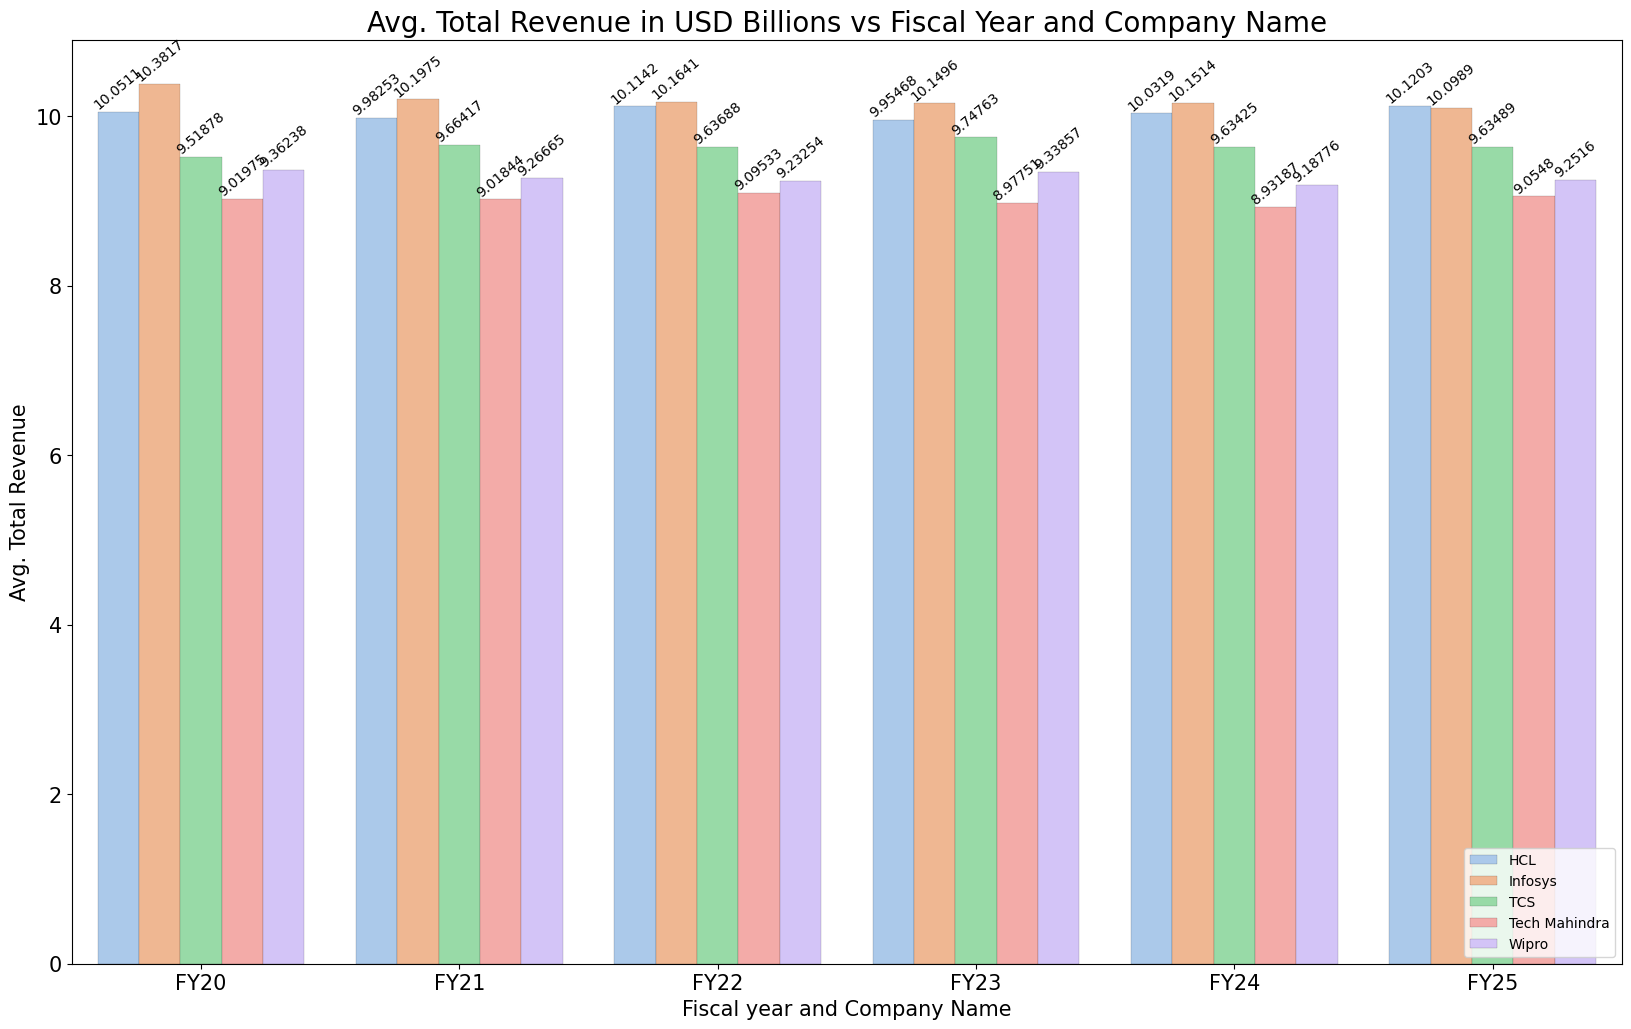

In [88]:
# Setting the figure for the graph
plt.figure(figsize = (20,12))

# Preparing the values for the graph
average_total_revenue_per_company_and_fiscal_year = df_IT_companies_data.groupby(['Fiscal_Year', 'Company_Name'])['Total_Revenue_in_USD_Billions'].mean().reset_index()

# Plotting the graph
ax = sns.barplot(x = 'Fiscal_Year', y = 'Total_Revenue_in_USD_Billions', hue = 'Company_Name', data = average_total_revenue_per_company_and_fiscal_year, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the legend of the graph
plt.legend(loc = 'lower right')

# Setting the x axis' name
plt.xlabel("Fiscal year and Company Name", fontsize = 15)

# Setting the y axis' name
plt.ylabel("Avg. Total Revenue", fontsize = 15)

# Setting the values for the x and y axis' name
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Setting the title value
plt.title("Avg. Total Revenue in USD Billions vs Fiscal Year and Company Name", fontsize = 20)

# Setting the values of the bar
for container in ax.containers:
    ax.bar_label(container, fontsize = 10, rotation = 40)

# Displaying the graph
plt.show()

**Interpretation**

We can see here following things:

- **Infosys** has been in the lead in terms of **Total_Revenue** of all the companies, but from **FY20** it has been mildly decreasing continuously.
- **HCL** which is the second in lead, has been fluctuating between **10** and **9** Billion dollars.
- **Revenue** of rest of the companies has been constant mostly.

### 3. Plotting a bar chart with **Avg. `Hiring_Rate_in_Percentage`** vs **`Company_Name`** and **`Fiscal_Year`**.

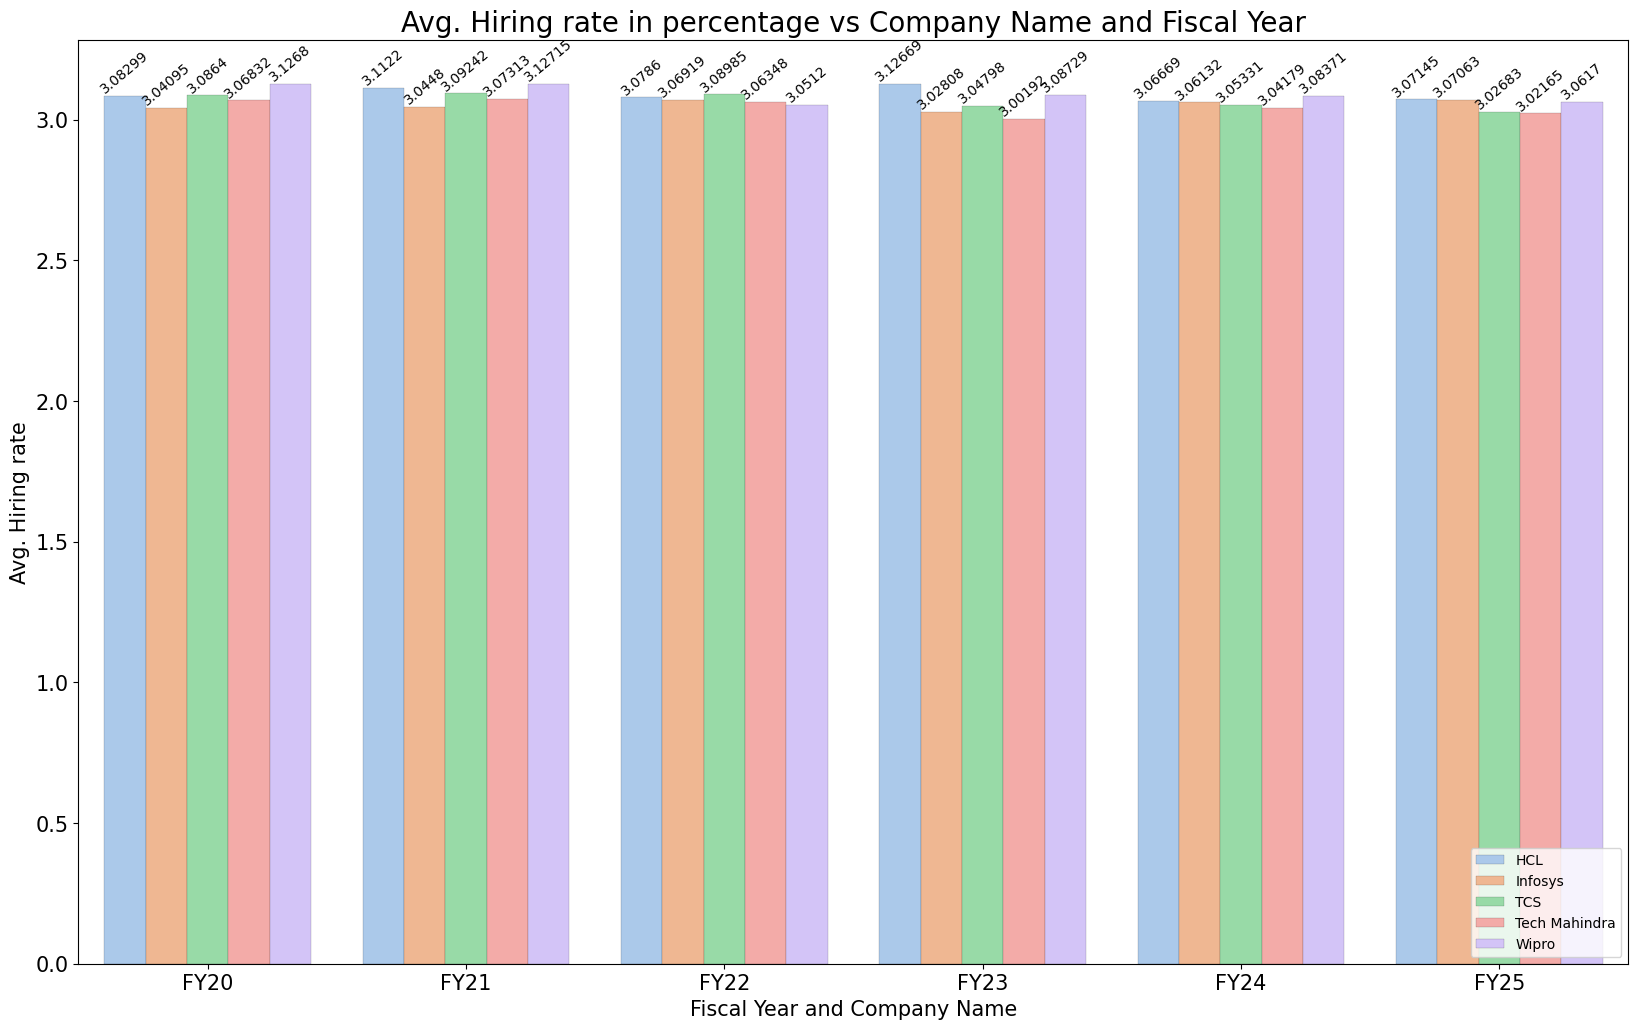

In [89]:
# Setting the figure for the graph
plt.figure(figsize = (20,12))

# Preparing the data for the graph
average_Hiring_rate_per_company_and_fiscal_year = df_IT_companies_data.groupby(['Company_Name', 'Fiscal_Year'])['Hiring_Rate_in_Percentage'].mean().reset_index()

# Plotting the graph
ax = sns.barplot(x = 'Fiscal_Year', y = 'Hiring_Rate_in_Percentage', hue = 'Company_Name', data = average_Hiring_rate_per_company_and_fiscal_year, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the position of the legend
plt.legend(loc = "lower right")

# Setting x axis' name
plt.xlabel("Fiscal Year and Company Name", fontsize = 15)

# Setting y axis' name
plt.ylabel("Avg. Hiring rate", fontsize = 15)

# Setting size of the axis' values
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Setting title of the graph
plt.title("Avg. Hiring rate in percentage vs Company Name and Fiscal Year", fontsize = 20)

# Setting the values of the bars
for container in ax.containers:
    ax.bar_label(container,fontsize = 10, rotation = 40)

# Displaying the graph
plt.show()

**Interpretation**

- We can see that hiring rate is the lowest for **Infosys** in **FY20** and **FY21**, and in our above observation of **Avg. Revenue per employee** and **Avg. Total Revenue** we saw that they were high in **FY20** and **FY21**. So we can say that **Hiring rate** has some impact on **Revenue per employee** and **Total revenue**.

- Similarly **HCL** had highest **Hiring rate** in **FY23** and we saw above it had lowest **Avg. Revenue per employee** and **Avg. Total Revenue** in **FY23**.

- For **TCS**, **Tech Mahindra** and **Wipro** too has experienced similar relation between **Hiring rate** and **Revenue**.

### 4. Plotting a bar chart with **Avg. `Attrition_Rate_in_Percentage`** vs **`Company_Name`** and **`Fiscal_Year`**.

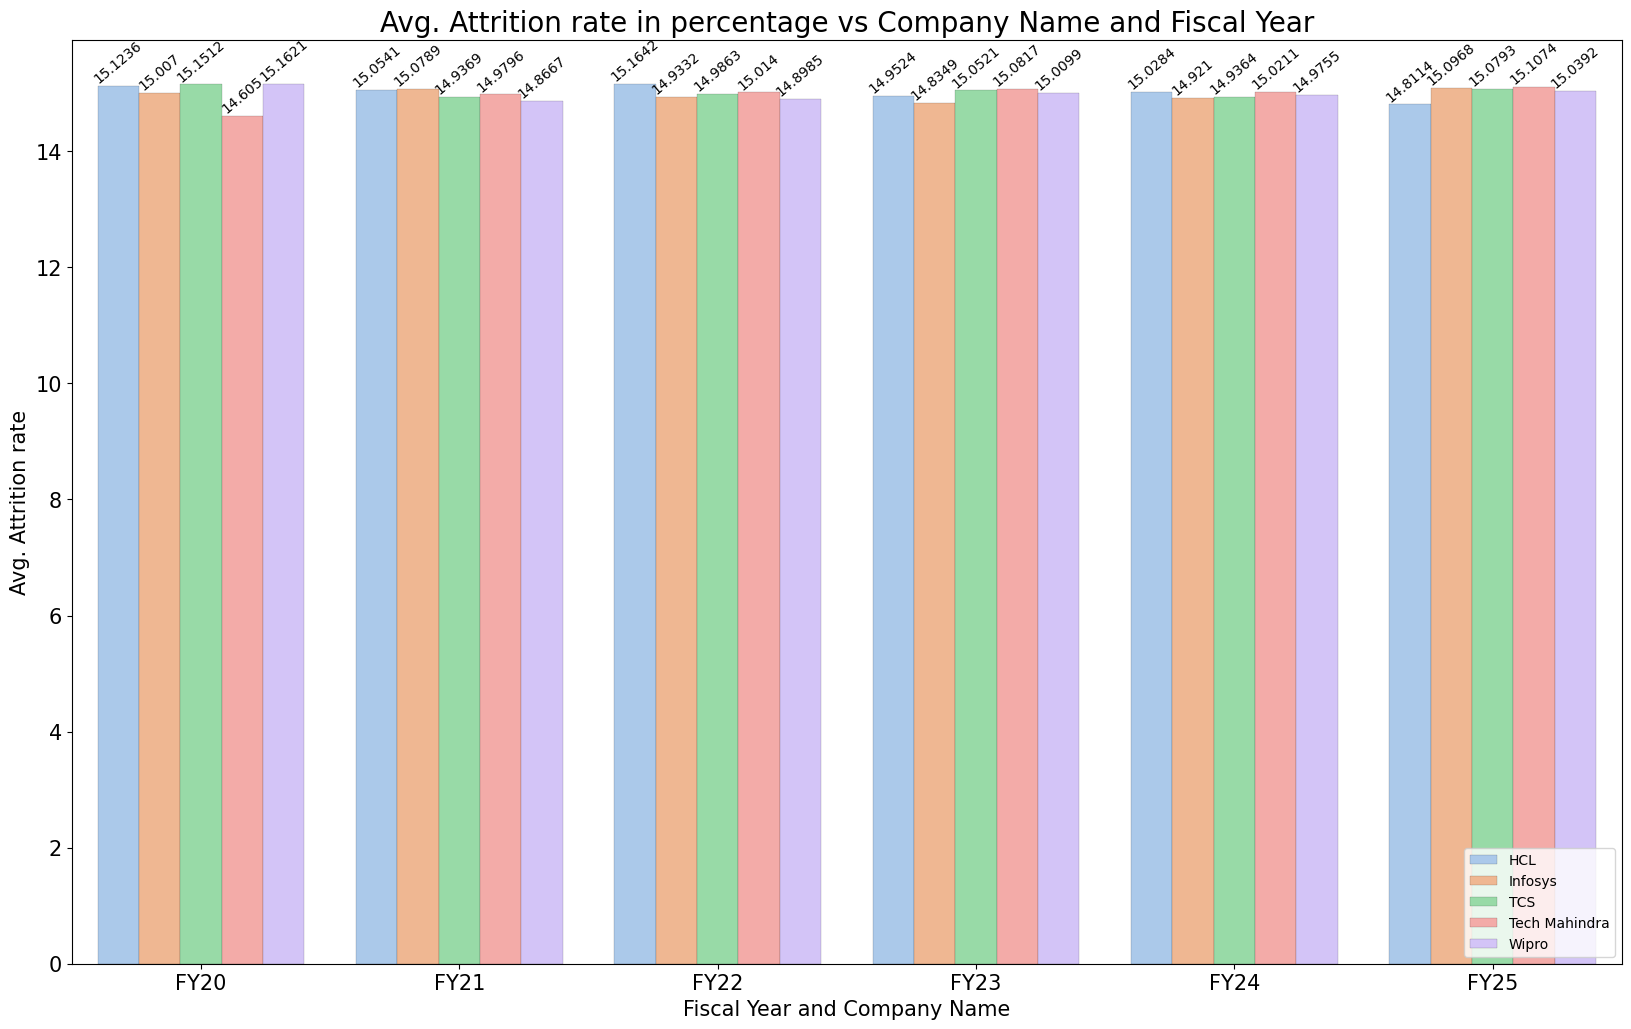

In [90]:
# Setting the figure for the graph
plt.figure(figsize = (20,12))

# Preparing the data for the graph
average_Attrition_rate_per_company_and_fiscal_year = df_IT_companies_data.groupby(['Company_Name', 'Fiscal_Year'])['Attrition_Rate_in_Percentage'].mean().reset_index()

# Plotting the graph
ax = sns.barplot(x = 'Fiscal_Year', y = 'Attrition_Rate_in_Percentage', hue = 'Company_Name', data = average_Attrition_rate_per_company_and_fiscal_year, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the position of the legend
plt.legend(loc = "lower right")

# Setting x axis' name
plt.xlabel("Fiscal Year and Company Name", fontsize = 15)

# Setting y axis' name
plt.ylabel("Avg. Attrition rate", fontsize = 15)

# Setting size of the axis' values
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Setting title of the graph
plt.title("Avg. Attrition rate in percentage vs Company Name and Fiscal Year", fontsize = 20)

# Setting the values of the bars
for container in ax.containers:
    ax.bar_label(container,fontsize = 10, rotation = 40)

# Displaying the graph
plt.show()

**Interpretation**

- We can see that for all the companies in whichever **fiscal year** the **attrition rate** was low in that year it had low **Avg. Total Revenue** and **Avg. Revenue per employee**, observing this by seeing above graphs of **Total revenue** and **Revenue per employee**.

### 5. Plotting a bar chart with **Avg. `Automation_Investment_in_USD_Millions`** vs **`Company_Name`** and **`Fiscal_Year`**.

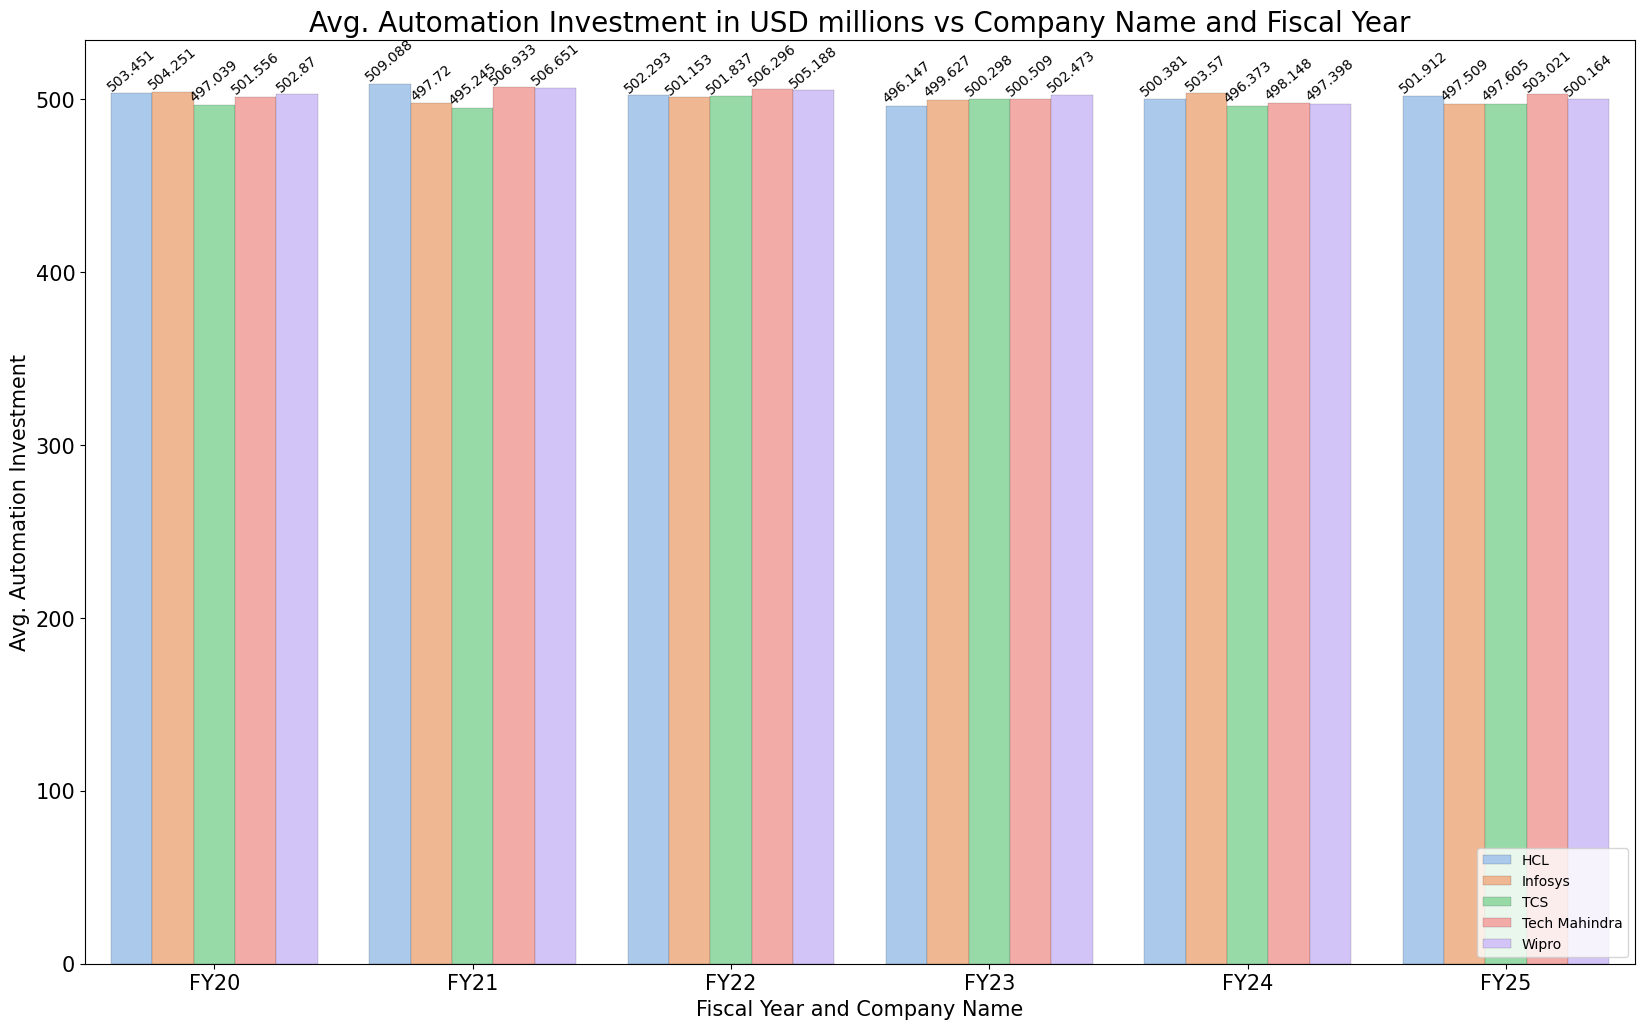

In [91]:
# Setting the figure for the graph
plt.figure(figsize = (20,12))

# Preparing the data for the graph
average_Attrition_rate_per_company_and_fiscal_year = df_IT_companies_data.groupby(['Company_Name', 'Fiscal_Year'])['Automation_Investment_in_USD_Millions'].mean().reset_index()

# Plotting the graph
ax = sns.barplot(x = 'Fiscal_Year', y = 'Automation_Investment_in_USD_Millions', hue = 'Company_Name', data = average_Attrition_rate_per_company_and_fiscal_year, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the position of the legend
plt.legend(loc = "lower right")

# Setting x axis' name
plt.xlabel("Fiscal Year and Company Name", fontsize = 15)

# Setting y axis' name
plt.ylabel("Avg. Automation Investment", fontsize = 15)

# Setting size of the axis' values
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Setting title of the graph
plt.title("Avg. Automation Investment in USD millions vs Company Name and Fiscal Year", fontsize = 20)

# Setting the values of the bars
for container in ax.containers:
    ax.bar_label(container,fontsize = 10, rotation = 40)

# Displaying the graph
plt.show()

**Interpretation**

We can again see here that for all the companies with high **Automation Investment** has high **Revenue per Employee** and **Total Revenue**. Which says that use of Automation increased the companies' Financial performance.

### 5. Plotting a bar chart with **Avg. `Software_Sales_Revenue_in_USD_Millions`** vs **`Company_Name`** and **`Fiscal_Year`**.

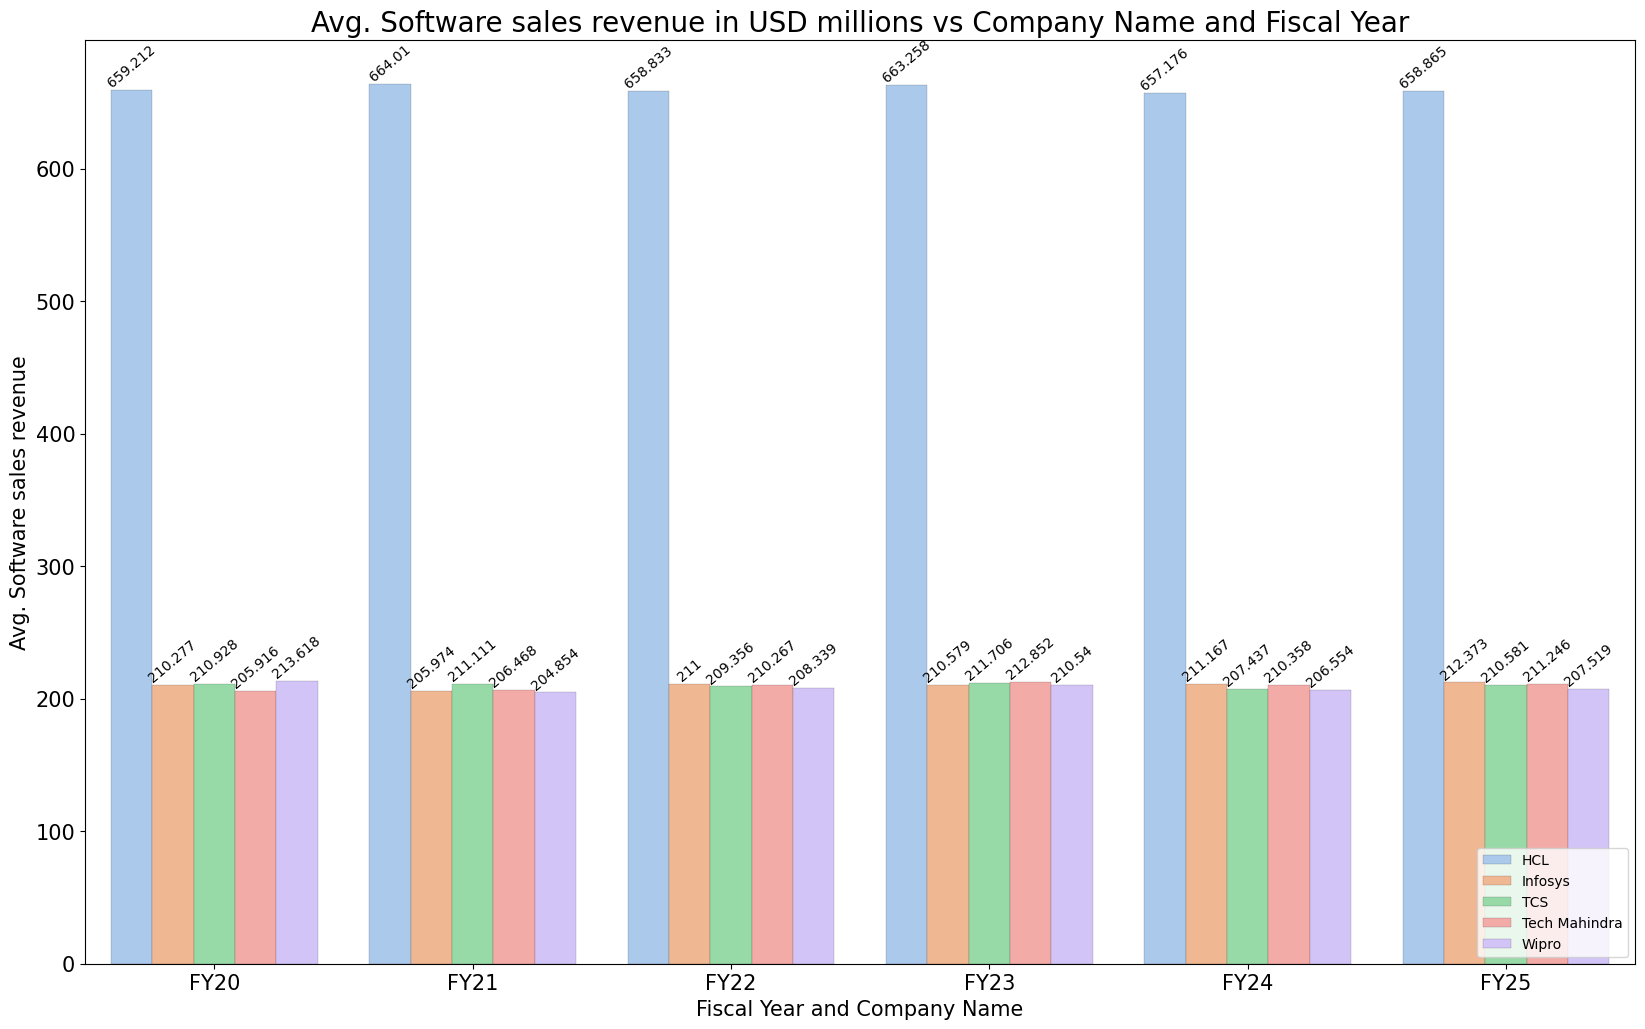

In [92]:
# Setting the figure for the graph
plt.figure(figsize = (20,12))

# Preparing the data for the graph
average_Attrition_rate_per_company_and_fiscal_year = df_IT_companies_data.groupby(['Company_Name', 'Fiscal_Year'])['Software_Sales_Revenue_in_USD_Millions'].mean().reset_index()

# Plotting the graph
ax = sns.barplot(x = 'Fiscal_Year', y = 'Software_Sales_Revenue_in_USD_Millions', hue = 'Company_Name', data = average_Attrition_rate_per_company_and_fiscal_year, palette = 'pastel', edgecolor = 'black', linewidth = 0.1)

# Setting the position of the legend
plt.legend(loc = "lower right")

# Setting x axis' name
plt.xlabel("Fiscal Year and Company Name", fontsize = 15)

# Setting y axis' name
plt.ylabel("Avg. Software sales revenue", fontsize = 15)

# Setting size of the axis' values
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# Setting title of the graph
plt.title("Avg. Software sales revenue in USD millions vs Company Name and Fiscal Year", fontsize = 20)

# Setting the values of the bars
for container in ax.containers:
    ax.bar_label(container,fontsize = 10, rotation = 40)

# Displaying the graph
plt.show()

**Interpretation**

We can see here that **Avg. software sales revenue** for all the companies has been constant through out the fiscal years. But for **HCL** it has been pretty high compared to others, it is because we know that **HCL** has a good share in the product based sales.

**Conclusion**

Finally, after all these analysis and observations we can see that **Hiring trends**, **Automation Increase** and **Software Sales** has positively impacted the **Revenue per employee** and overall financial performance of the company.